In [53]:
import json
import os
import numpy as np
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re
from docx import Document
from docx.shared import Pt
import pickle
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from IPython.display import display

import math
import statistics
from scipy.stats import norm

from IPython.display import display


from matplotlib.pyplot import figure

In [54]:
def save_dataframe(file_name, dataframe_to_save):
    
    try:
        dataframe_to_save.to_csv(path_dataset+file_name+".csv", index = False, sep = "\t")
        print("File salvato correttamente")
        
    except:
        print("Errore nel salvataggio")
    
    return 

In [55]:
risorsa = 'TEDx'

In [56]:
path_dataset = "../dataset/"

In [57]:
path_risorse = "../dataset/cosine_distances/"

In [58]:
path_images = "../plots/"
path_images_tit_ridotti = "../plots_titoli_ridotti/"

In [59]:
df_dist_5_cosine_distance_no_pretrain = pd.read_csv("{}df_dist_5_cosine_distance_no_pretrain.csv".format(path_risorse), sep="\t")
df_dist_10_cosine_distance_no_pretrain = pd.read_csv("{}df_dist_10_cosine_distance_no_pretrain.csv".format(path_risorse), sep="\t")
df_dist_20_cosine_distance_no_pretrain = pd.read_csv("{}df_dist_20_cosine_distance_no_pretrain.csv".format(path_risorse), sep="\t")
df_dist_30_cosine_distance_no_pretrain = pd.read_csv("{}df_dist_30_cosine_distance_no_pretrain.csv".format(path_risorse), sep="\t")

In [60]:
df_dist_5_cosine_distance_no_pretrain

Id                                         Sentence_1  \
0      29327  Goldman Prize, che è un po' il Nobel dell'ambi...   
1      67142  Nonostante sia stato terminato come progetto, ...   
2       9675                             Non l'aveva mai visto.   
3      16322  E in quel momento senza nessun dubbio abbiamo ...   
4      71604  I giornalisti di ProPublica, una testata inves...   
...      ...                                                ...   
2395  171348  Dietro però c'è stato un piano e c'è anche un ...   
2396  180390                                    Succede spesso.   
2397  195372  Perché dovremmo impegnarci in questa combinazi...   
2398   84571  Al contrario, in inverno, si vede la Via Latte...   
2399   16522  Pensate che alla fine degli anni Novanta si pe...   

                                             Sentence_2  Class  \
0     Se voi passeggiate per Cerro de Pasco, o per q...      1   
1     In più, si prestano benissimo questi moduli ad...      1   
2     Se l'era immaginato tante volte ma anche adess...      0   
3     Vedete, in quel momento ho capito una cosa mol...      0   
4     Ora, come non è vero che i miei capelli rossi ...      0   
...                                                 ...    ...   
2395  Tra parentesi, la settimana scorsa vari sondag...      1   
2396  Se sanguino, ovviamente la medicazione la fa l...      0   
2397  Perché impegnarci in questa combinazione di sk...      1   
2398  Presenta meno colori, meno forme e soprattutto...      0   
2399  In realtà si è capito che eravamo solo all'ini...      0   

      Cosine_distance_layer_1  Cosine_distance_layer_2  \
0                      0.0016                   0.0031   
1                      0.0008                   0.0018   
2                      0.0026                   0.0058   
3                      0.0020                   0.0042   
4                      0.0009                   0.0020   
...                       ...                      ...   
2395                   0.0009                   0.0020   
2396                   0.0052                   0.0111   
2397                   0.0007                   0.0014   
2398                   0.0009                   0.0017   
2399                   0.0011                   0.0023   

      Cosine_distance_layer_3  Cosine_distance_layer_4  \
0                      0.0047                   0.0062   
1                      0.0028                   0.0041   
2                      0.0089                   0.0122   
3                      0.0064                   0.0084   
4                      0.0031                   0.0040   
...                       ...                      ...   
2395                   0.0031                   0.0042   
2396                   0.0169                   0.0237   
2397                   0.0022                   0.0031   
2398                   0.0024                   0.0033   
2399                   0.0035                   0.0051   

      Cosine_distance_layer_5  Cosine_distance_layer_6  \
0                      0.0085                   0.0107   
1                      0.0053                   0.0061   
2                      0.0158                   0.0182   
3                      0.0110                   0.0129   
4                      0.0051                   0.0065   
...                       ...                      ...   
2395                   0.0054                   0.0060   
2396                   0.0302                   0.0373   
2397                   0.0039                   0.0048   
2398                   0.0039                   0.0052   
2399                   0.0064                   0.0077   

      Cosine_distance_layer_7  Cosine_distance_layer_8  \
0                      0.0127                   0.0144   
1                      0.0067                   0.0075   
2                      0.0210                   0.0225   
3                      0.0152                   0.0167   
4                      0.0075  

In [61]:
df_dist_10_cosine_distance_no_pretrain

Id                                         Sentence_1  \
0     187101  E succedeva così anche ai buffoni di corte, ch...   
1      12909  Come può esserci il debito pubblico se la mone...   
2       8370  Si potrebbe obiettare che non sia giusto togli...   
3     166395  E quello di cui vi vorrei parlare oggi è appun...   
4     152516  È una matematica che vorrebbe essere, come det...   
...      ...                                                ...   
2395   46599                  Però lo metto un attimo da parte.   
2396   33169  Questa brassicoleracea è una piantina abbastan...   
2397  187880  Noi ci esprimiamo con tantissima mimica facciale.   
2398  120228  E soprattutto, come mai alcuni hanno totalizza...   
2399  102370  È bravo a tal punto da esportare canne e ance ...   

                                             Sentence_2  Class  \
0     Ma nella sua essenza, io credo che l'intento d...      0   
1                   Chiaramente vi è una grande truffa.      0   
2     Solo nel 2017 abbiamo già lavorato con oltre 1...      1   
3     Sono tornato a casa per la prima volta dopo ci...      1   
4     Con la matematica siamo però già vicini a pote...      1   
...                                                 ...    ...   
2395  Perché c'è il prima, e venendo qua, o pensando...      0   
2396  La domesticazione è quel processo meraviglioso...      1   
2397      Questa è la maschera tipica del teatro greco.      0   
2398  Tutto questo accade nel nostro cervello, autom...      1   
2399  E così via, ne ha ricostruito altri che adesso...      1   

      Cosine_distance_layer_1  Cosine_distance_layer_2  \
0                      0.0006                   0.0012   
1                      0.0028                   0.0052   
2                      0.0016                   0.0032   
3                      0.0012                   0.0023   
4                      0.0014                   0.0032   
...                       ...                      ...   
2395                   0.0031                   0.0060   
2396                   0.0014                   0.0026   
2397                   0.0023                   0.0044   
2398                   0.0028                   0.0052   
2399                   0.0014                   0.0032   

      Cosine_distance_layer_3  Cosine_distance_layer_4  \
0                      0.0017                   0.0022   
1                      0.0075                   0.0096   
2                      0.0046                   0.0060   
3                      0.0033                   0.0042   
4                      0.0048                   0.0059   
...                       ...                      ...   
2395                   0.0090                   0.0125   
2396                   0.0038                   0.0047   
2397                   0.0067                   0.0082   
2398                   0.0079                   0.0101   
2399                   0.0046                   0.0063   

      Cosine_distance_layer_5  Cosine_distance_layer_6  \
0                      0.0026                   0.0032   
1                      0.0134                   0.0161   
2                      0.0084                   0.0100   
3                      0.0055                   0.0063   
4                      0.0077                   0.0100   
...                       ...                      ...   
2395                   0.0164                   0.0196   
2396                   0.0063                   0.0076   
2397                   0.0106                   0.0132   
2398                   0.0130                   0.0146   
2399                   0.0084                   0.0097   

      Cosine_distance_layer_7  Cosine_distance_layer_8  \
0                      0.0039                   0.0039   
1                      0.0200                   0.0227   
2                      0.0116                   0.0130   
3                      0.0072                   0.0078   
4                      0.0119  

In [62]:
df_dist_20_cosine_distance_no_pretrain

Id                                         Sentence_1  \
0     147568         Si innesca così un effetto moltiplicatore.   
1     194184  Un fatto che Ruta mi aveva raccontato su quest...   
2     172450  Dobbiamo davvero ricominciare con la consapevo...   
3     152660  Beh, dobbiamo fare come, abbiamo visto, fanno ...   
4       9218  In questo passaggio, chiaramente ci stiamo all...   
...      ...                                                ...   
2395  106618  Di un paese che vanta più di 120 prodotti agro...   
2396  164120      E allora provate a sentire il vostro respiro.   
2397   40916  Bene, voi direte: "Questo è un problema che ta...   
2398  182843  Quello lì è il Dottor Spock, probabilmente nes...   
2399  198572  Quando io porto un giornalista, un blogger, a ...   

                                             Sentence_2  Class  \
0     Il microcredito è solo una delle tante azioni ...      1   
1     Ci ha vestito con i nostri vestitini tradizion...      0   
2     Il progetto di dare così tanto valore ai bambi...      0   
3     La prima cosa che dobbiamo dare all'intelligen...      0   
4     Quindi, gli appartamenti più ambiti di Milano ...      0   
...                                                 ...    ...   
2395  Giulia, Luigi, Francesco e i suoi amici stanno...      0   
2396  Allora noi, quando siamo in relazione nei conf...      1   
2397  Secondo Banca Italia, le rimesse negli ultimi ...      1   
2398  Durante la prima settimana abbiamo avuto modo ...      1   
2399  Questo terreno fertile ha tre macro aree: l'ar...      1   

      Cosine_distance_layer_1  Cosine_distance_layer_2  \
0                      0.0027                   0.0054   
1                      0.0012                   0.0022   
2                      0.0014                   0.0030   
3                      0.0023                   0.0045   
4                      0.0009                   0.0016   
...                       ...                      ...   
2395                   0.0017                   0.0033   
2396                   0.0031                   0.0054   
2397                   0.0011                   0.0021   
2398                   0.0012                   0.0024   
2399                   0.0015                   0.0030   

      Cosine_distance_layer_3  Cosine_distance_layer_4  \
0                      0.0076                   0.0107   
1                      0.0031                   0.0045   
2                      0.0044                   0.0061   
3                      0.0067                   0.0090   
4                      0.0025                   0.0035   
...                       ...                      ...   
2395                   0.0048                   0.0066   
2396                   0.0079                   0.0114   
2397                   0.0032                   0.0045   
2398                   0.0042                   0.0057   
2399                   0.0047                   0.0065   

      Cosine_distance_layer_5  Cosine_distance_layer_6  \
0                      0.0142                   0.0169   
1                      0.0054                   0.0064   
2                      0.0077                   0.0092   
3                      0.0109                   0.0124   
4                      0.0044                   0.0054   
...                       ...                      ...   
2395                   0.0078                   0.0089   
2396                   0.0141                   0.0170   
2397                   0.0055                   0.0064   
2398                   0.0071                   0.0081   
2399                   0.0086                   0.0103   

      Cosine_distance_layer_7  Cosine_distance_layer_8  \
0                      0.0205                   0.0231   
1                      0.0077                   0.0079   
2                      0.0113                   0.0130   
3                      0.0149                   0.0183   
4                      0.0064  

In [63]:
df_dist_30_cosine_distance_no_pretrain

Id                                         Sentence_1  \
0     194114  Ma ci siamo accorti di quanto la risposta "Non...   
1      97277                                  Da dove iniziamo?   
2     189770                    Dalla sua pace, la mia dipende.   
3      17538  Dentro questa stanza c'è una scala, e sopra la...   
4      22122  Affronteremo insieme un doppio dialogo dove io...   
...      ...                                                ...   
2395   43183  Il problema è che tutto questo non tiene conto...   
2396  155307  Oppure, su di loro scaricavi la tua rabbia, so...   
2397  145329  I miei contenuti non sono mai stati particolar...   
2398  148226  La cultura è l'unica cosa che davvero cresce g...   
2399   28789  Un po' di mesi fa abbiamo portato in carcere a...   

                                             Sentence_2  Class  \
0               Le slides sono rimaste fisse da un po'.      1   
1                                          Bel mix, no?      1   
2                  Quel che a lei piace, vita mi rende.      0   
3     Le scimmie vedono le banane e vanno per prende...      0   
4          Questa sembra quasi la trama di un film, no?      1   
...                                                 ...    ...   
2395  Ci sono algoritmi che stabiliscono se voi svil...      1   
2396  Sì, ho combattuto davvero le battaglie sbagliate.      0   
2397  Molti chiedono di collaborare perché hanno fid...      1   
2398  Tra l'altro quello è un momento drammatico per...      1   
2399  Hanno scoperto che sono delle persone normali,...      0   

      Cosine_distance_layer_1  Cosine_distance_layer_2  \
0                      0.0025                   0.0048   
1                      0.0033                   0.0064   
2                      0.0019                   0.0040   
3                      0.0019                   0.0038   
4                      0.0023                   0.0049   
...                       ...                      ...   
2395                   0.0019                   0.0041   
2396                   0.0026                   0.0051   
2397                   0.0017                   0.0032   
2398                   0.0012                   0.0023   
2399                   0.0020                   0.0041   

      Cosine_distance_layer_3  Cosine_distance_layer_4  \
0                      0.0071                   0.0106   
1                      0.0098                   0.0135   
2                      0.0069                   0.0093   
3                      0.0060                   0.0083   
4                      0.0072                   0.0093   
...                       ...                      ...   
2395                   0.0063                   0.0091   
2396                   0.0075                   0.0099   
2397                   0.0049                   0.0071   
2398                   0.0040                   0.0056   
2399                   0.0066                   0.0088   

      Cosine_distance_layer_5  Cosine_distance_layer_6  \
0                      0.0145                   0.0170   
1                      0.0167                   0.0219   
2                      0.0125                   0.0148   
3                      0.0118                   0.0146   
4                      0.0119                   0.0149   
...                       ...                      ...   
2395                   0.0116                   0.0131   
2396                   0.0139                   0.0166   
2397                   0.0091                   0.0109   
2398                   0.0072                   0.0093   
2399                   0.0125                   0.0150   

      Cosine_distance_layer_7  Cosine_distance_layer_8  \
0                      0.0211                   0.0236   
1                      0.0257                   0.0274   
2                      0.0179                   0.0198   
3                      0.0176                   0.0193   
4                      0.0173  

In [64]:
list_of_df_no_pretrain = [df_dist_5_cosine_distance_no_pretrain, df_dist_10_cosine_distance_no_pretrain, 
              df_dist_20_cosine_distance_no_pretrain, df_dist_30_cosine_distance_no_pretrain]
list_of_names_no_pretrain = ['df_dist_5', 'df_dist_10', 'df_dist_20', 'df_dist_30']

In [65]:
def get_summary_of_cosine_distances(list_of_df, list_of_names):
    
    df_summary = {}
    
    for df, df_name in zip(list_of_df, list_of_names):
        
        df_summary[df_name] = {}
        
        #dataset delle frasi non consecutive
        df_frasi_non_consecutive = df[df['Class'] == 1]
        
        #dataset delle frasi consecutive
        df_frasi_consecutive = df[df['Class'] == 0]
        
        #colonne dei layers
        layer_columns = [col for col in df.columns if 'Cosine_distance' in col]
        
        for layer_col in layer_columns:
            
            df_summary[df_name][layer_col] = {}
            
            df_summary[df_name][layer_col]['1'] = {
                'Mean': float("%.4f"%(np.mean(df_frasi_non_consecutive[layer_col].values))),
                'Standard Deviation': float("%.4f"%(np.std(df_frasi_non_consecutive[layer_col].values)))
                
            }
            df_summary[df_name][layer_col]['0'] = {
                'Mean': float("%.4f"%(np.mean(df_frasi_consecutive[layer_col].values))),
                'Standard Deviation': float("%.4f"%(np.std(df_frasi_consecutive[layer_col].values)))
                
            }
    
    return df_summary

In [66]:
df_cosine_distances_dict_no_pretrain = get_summary_of_cosine_distances(list_of_df_no_pretrain, list_of_names_no_pretrain)

In [67]:
df_cosine_distances_dict_no_pretrain

{'df_dist_5': {'Cosine_distance_layer_1': {'1': {'Mean': 0.0022,
    'Standard Deviation': 0.0011},
   '0': {'Mean': 0.0021, 'Standard Deviation': 0.0011}},
  'Cosine_distance_layer_2': {'1': {'Mean': 0.0046,
    'Standard Deviation': 0.0024},
   '0': {'Mean': 0.0045, 'Standard Deviation': 0.0024}},
  'Cosine_distance_layer_3': {'1': {'Mean': 0.007,
    'Standard Deviation': 0.0037},
   '0': {'Mean': 0.0069, 'Standard Deviation': 0.0036}},
  'Cosine_distance_layer_4': {'1': {'Mean': 0.0095,
    'Standard Deviation': 0.0049},
   '0': {'Mean': 0.0093, 'Standard Deviation': 0.0048}},
  'Cosine_distance_layer_5': {'1': {'Mean': 0.012,
    'Standard Deviation': 0.0061},
   '0': {'Mean': 0.0117, 'Standard Deviation': 0.006}},
  'Cosine_distance_layer_6': {'1': {'Mean': 0.0146,
    'Standard Deviation': 0.0074},
   '0': {'Mean': 0.0142, 'Standard Deviation': 0.0074}},
  'Cosine_distance_layer_7': {'1': {'Mean': 0.0166,
    'Standard Deviation': 0.0083},
   '0': {'Mean': 0.0162, 'Standard Devi

In [68]:
list_of_dataframes = []

for df, l in df_cosine_distances_dict_no_pretrain.items():
    
    lista_valori = []
    lista_colonne = []
    
    for layer, classe in l.items():
        for cl, valore in classe.items():
            #cl_tradotta = "Non segue" if cl == '1' else "Segue"
            for m, v in valore.items():
                l = layer.replace('Cosine_distance', 'C_dist')
                lista_colonne.append((l, cl, m))
                lista_valori.append(v)
        
    df_temp = pd.DataFrame([lista_valori], columns = lista_colonne, index = [df])
    df_temp.columns = pd.MultiIndex.from_tuples(df_temp.columns)
    
    list_of_dataframes.append(df_temp)
    
result = pd.concat(list_of_dataframes).T

headers = {'selector':'th', 'props': [('text-align', 'center'), ('border', '1px solid black')]}
rows = {'selector': 'td', 'props': 'border: 1px solid black'}

save_dataframe('{}_mean_cosine_dist_no_pretrain'.format(risorsa), result)

#result.style.set_table_styles([headers, rows], overwrite=False).format(precision=4)

File salvato correttamente


In [69]:
result

df_dist_5  df_dist_10  df_dist_20  \
C_dist_layer_1  1 Mean                   0.0022      0.0023      0.0024   
                  Standard Deviation     0.0011      0.0012      0.0012   
                0 Mean                   0.0021      0.0023      0.0022   
                  Standard Deviation     0.0011      0.0012      0.0011   
C_dist_layer_2  1 Mean                   0.0046      0.0046      0.0046   
                  Standard Deviation     0.0024      0.0023      0.0023   
                0 Mean                   0.0045      0.0044      0.0043   
                  Standard Deviation     0.0024      0.0022      0.0022   
C_dist_layer_3  1 Mean                   0.0070      0.0068      0.0068   
                  Standard Deviation     0.0037      0.0034      0.0033   
                0 Mean                   0.0069      0.0065      0.0064   
                  Standard Deviation     0.0036      0.0033      0.0032   
C_dist_layer_4  1 Mean                   0.0095      0.0087      0.0094   
                  Standard Deviation     0.0049      0.0044      0.0047   
                0 Mean                   0.0093      0.0084      0.0089   
                  Standard Deviation     0.0048      0.0042      0.0045   
C_dist_layer_5  1 Mean                   0.0120      0.0115      0.0118   
                  Standard Deviation     0.0061      0.0058      0.0060   
                0 Mean                   0.0117      0.0111      0.0112   
                  Standard Deviation     0.0060      0.0056      0.0058   
C_dist_layer_6  1 Mean                   0.0146      0.0141      0.0140   
                  Standard Deviation     0.0074      0.0072      0.0069   
                0 Mean                   0.0142      0.0136      0.0132   
                  Standard Deviation     0.0074      0.0068      0.0066   
C_dist_layer_7  1 Mean                   0.0166      0.0164      0.0168   
                  Standard Deviation     0.0083      0.0083      0.0082   
                0 Mean                   0.0162      0.0158      0.0158   
                  Standard Deviation     0.0082      0.0080      0.0079   
C_dist_layer_8  1 Mean                   0.0184      0.0182      0.0186   
                  Standard Deviation     0.0090      0.0093      0.0089   
                0 Mean                   0.0179      0.0176      0.0176   
                  Standard Deviation     0.0090      0.0090      0.0086   
C_dist_layer_9  1 Mean                   0.0218      0.0197      0.0216   
                  Standard Deviation     0.0108      0.0100      0.0104   
                0 Mean                   0.0213      0.0191      0.0204   
                  Standard Deviation     0.0107      0.0097      0.0100   
C_dist_layer_10 1 Mean                   0.0257      0.0220      0.0227   
                  Standard Deviation     0.0130      0.0110      0.0109   
                0 Mean                   0.0251      0.0213      0.0214   
                  Standard Deviation     0.0128      0.0108      0.0106   
C_dist_layer_11 1 Mean                   0.0280      0.0244      0.0253   
                  Standard Deviation     0.0142      0.0121      0.0121   
                0 Mean                   0.0274      0.0237      0.0238   
                  Standard Deviation     0.0141      0.0118      0.0116   
C_dist_layer_12 1 Mean                   0.0303      0.0260      0.0259   
                  Standard Deviation     0.0153      0.0132      0.0122   
                0 Mean                   0.0296      0.0252      0.0245   
                  Standard Deviation     0.0152      0.0128      0.0118   

                                      df_dist_30  
C_dist_layer_1  1 Mean                    0.0022  
                  Standard Deviation      0.0011  
                0 Mean                    0.0021  
                  Standard Deviation      0.0011  
C_dist_layer_2  1 Mean                    0.0045  
                  Standard Deviation      0.0023  
     

In [70]:
from matplotlib import ticker
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

def plot_classes_cosine_distance_progress_across_layers(df_cosine_distances_dict, titolo_ridotto=''):
    
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15,5), sharey=True)
    
    for n, distance in enumerate(df_cosine_distances_dict):
        
        #layers
        layers = [layer for layer in df_cosine_distances_dict[distance]]
        
        #medie delle distanze coseniche per le classi
        mean_values_1 = [df_cosine_distances_dict[distance][layer]['1']['Mean'] \
                       for layer in df_cosine_distances_dict[distance]]
        
        mean_values_0 = [df_cosine_distances_dict[distance][layer]['0']['Mean'] \
                       for layer in df_cosine_distances_dict[distance]]

        ax[n].plot(layers, mean_values_1, label='1', color= 'r')
        ax[n].plot(layers, mean_values_0, label='0')
        ax[n].legend(title='Class')
        title = "{} Cosine distance mean's progress \nacross layers (distance {})".format(risorsa, ''.join([i for i in distance if i.isdigit()]))
        ax[n].set_title(title)
        if titolo_ridotto:
            title = "Distance {}".format(''.join([i for i in distance if i.isdigit()]))
        ax[n].set_title(title)
        ax[n].set_xticklabels(layers, rotation=90)
        
        ax[n].yaxis.set_major_locator(MultipleLocator(0.01))
        
        ax[n].yaxis.set_minor_locator(MultipleLocator(0.01))
        
                             
    plt.tight_layout()
    
    tit = "{} Cosine distance mean's progress across layers".format(risorsa)
    
    if titolo_ridotto:
        fig.savefig(path_images_tit_ridotti + tit + '_no_pretrain.png', dpi=fig.dpi, bbox_inches='tight')
    else:
        fig.savefig(path_images + tit + '_no_pretrain.png', dpi=fig.dpi, bbox_inches='tight')
    
    plt.show()

/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_5047/4236064431.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)
/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_5047/4236064431.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)
/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_5047/4236064431.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)
/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_5047/4236064431.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)


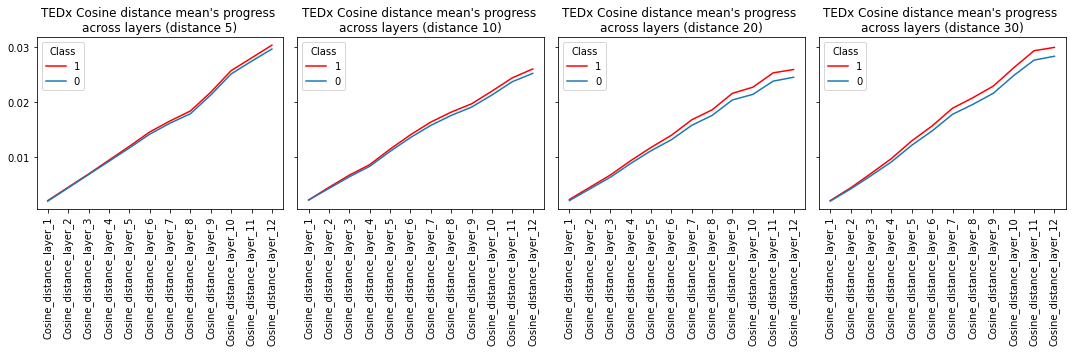

In [71]:
plot_classes_cosine_distance_progress_across_layers(df_cosine_distances_dict_no_pretrain)

/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_5047/4236064431.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)
/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_5047/4236064431.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)
/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_5047/4236064431.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)
/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_5047/4236064431.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)


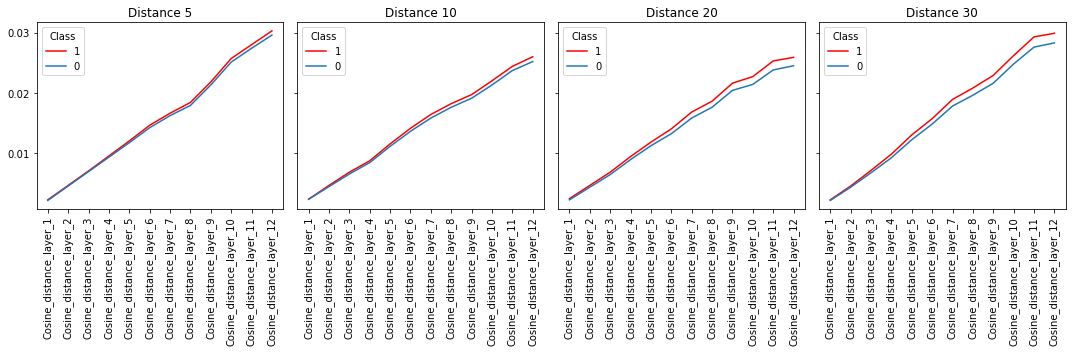

In [72]:
plot_classes_cosine_distance_progress_across_layers(df_cosine_distances_dict_no_pretrain, 'ridotto')

In [73]:
def plot_classes_cosine_distance_progress_across_layers_con_labels_specifiche(df_cosine_distances_dict, titolo_ridotto=''):
    
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15,5)) #, sharey=True
    
    for n, distance in enumerate(df_cosine_distances_dict):
        
        #layers
        layers = [layer for layer in df_cosine_distances_dict[distance]]
        
        #medie delle distanze coseniche per le classi
        mean_values_1 = [df_cosine_distances_dict[distance][layer]['1']['Mean'] \
                       for layer in df_cosine_distances_dict[distance]]
        
        mean_values_0 = [df_cosine_distances_dict[distance][layer]['0']['Mean'] \
                       for layer in df_cosine_distances_dict[distance]]

        ax[n].plot(layers, mean_values_1, label='Eventi non consecutivi', color= 'r')
        ax[n].plot(layers, mean_values_0, label='Eventi consecutivi')
        ax[n].legend(loc='upper left')
        title = "{} Cosine distance mean's progress \nacross layers (distance {})".format(risorsa, ''.join([i for i in distance if i.isdigit()]))
        ax[n].set_title(title)
        if titolo_ridotto:
            title = "Distance {}".format(''.join([i for i in distance if i.isdigit()]))
        ax[n].set_title(title)
        ax[n].set_xticklabels(layers, rotation=90)
        
        ax[n].yaxis.set_major_locator(MultipleLocator(0.01))
        
        ax[n].yaxis.set_minor_locator(MultipleLocator(0.01))
        
                             
    plt.tight_layout()
    
    tit = "{} Cosine distance mean's progress across layers".format(risorsa)
    
    if titolo_ridotto:
        fig.savefig(path_images_tit_ridotti + tit + '_no_pretrain.png', dpi=fig.dpi, bbox_inches='tight')
    else:
        fig.savefig(path_images + tit + '_no_pretrain.png', dpi=fig.dpi, bbox_inches='tight')
    
    plt.show()

/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_5047/4165576408.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)
/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_5047/4165576408.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)
/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_5047/4165576408.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)
/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_5047/4165576408.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)


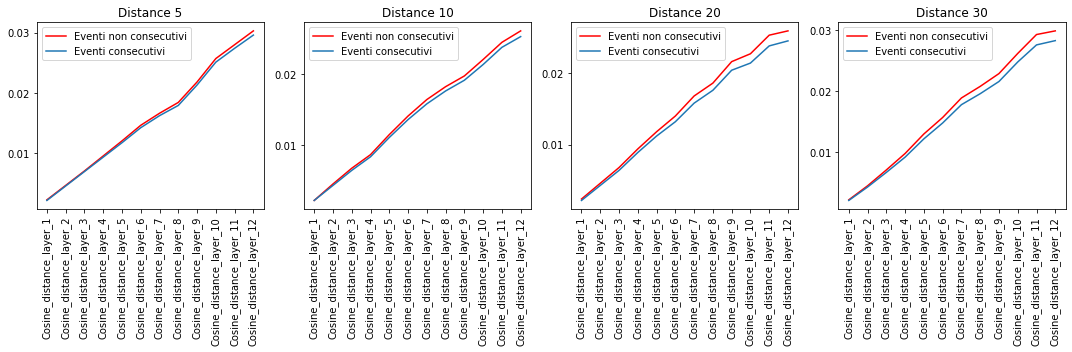

In [74]:
plot_classes_cosine_distance_progress_across_layers_con_labels_specifiche(df_cosine_distances_dict_no_pretrain, 'ridotto')

In [75]:
df_dist_5_cosine_distance_no_pretrain

Id                                         Sentence_1  \
0      29327  Goldman Prize, che è un po' il Nobel dell'ambi...   
1      67142  Nonostante sia stato terminato come progetto, ...   
2       9675                             Non l'aveva mai visto.   
3      16322  E in quel momento senza nessun dubbio abbiamo ...   
4      71604  I giornalisti di ProPublica, una testata inves...   
...      ...                                                ...   
2395  171348  Dietro però c'è stato un piano e c'è anche un ...   
2396  180390                                    Succede spesso.   
2397  195372  Perché dovremmo impegnarci in questa combinazi...   
2398   84571  Al contrario, in inverno, si vede la Via Latte...   
2399   16522  Pensate che alla fine degli anni Novanta si pe...   

                                             Sentence_2  Class  \
0     Se voi passeggiate per Cerro de Pasco, o per q...      1   
1     In più, si prestano benissimo questi moduli ad...      1   
2     Se l'era immaginato tante volte ma anche adess...      0   
3     Vedete, in quel momento ho capito una cosa mol...      0   
4     Ora, come non è vero che i miei capelli rossi ...      0   
...                                                 ...    ...   
2395  Tra parentesi, la settimana scorsa vari sondag...      1   
2396  Se sanguino, ovviamente la medicazione la fa l...      0   
2397  Perché impegnarci in questa combinazione di sk...      1   
2398  Presenta meno colori, meno forme e soprattutto...      0   
2399  In realtà si è capito che eravamo solo all'ini...      0   

      Cosine_distance_layer_1  Cosine_distance_layer_2  \
0                      0.0016                   0.0031   
1                      0.0008                   0.0018   
2                      0.0026                   0.0058   
3                      0.0020                   0.0042   
4                      0.0009                   0.0020   
...                       ...                      ...   
2395                   0.0009                   0.0020   
2396                   0.0052                   0.0111   
2397                   0.0007                   0.0014   
2398                   0.0009                   0.0017   
2399                   0.0011                   0.0023   

      Cosine_distance_layer_3  Cosine_distance_layer_4  \
0                      0.0047                   0.0062   
1                      0.0028                   0.0041   
2                      0.0089                   0.0122   
3                      0.0064                   0.0084   
4                      0.0031                   0.0040   
...                       ...                      ...   
2395                   0.0031                   0.0042   
2396                   0.0169                   0.0237   
2397                   0.0022                   0.0031   
2398                   0.0024                   0.0033   
2399                   0.0035                   0.0051   

      Cosine_distance_layer_5  Cosine_distance_layer_6  \
0                      0.0085                   0.0107   
1                      0.0053                   0.0061   
2                      0.0158                   0.0182   
3                      0.0110                   0.0129   
4                      0.0051                   0.0065   
...                       ...                      ...   
2395                   0.0054                   0.0060   
2396                   0.0302                   0.0373   
2397                   0.0039                   0.0048   
2398                   0.0039                   0.0052   
2399                   0.0064                   0.0077   

      Cosine_distance_layer_7  Cosine_distance_layer_8  \
0                      0.0127                   0.0144   
1                      0.0067                   0.0075   
2                      0.0210                   0.0225   
3                      0.0152                   0.0167   
4                      0.0075  

In [23]:
def plot_mean_and_stdev(df):
    
    for layer in range(1,13):
        
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
        
        for cl in [0, 1]:
            
            sns.distplot(df[df['Class'] == cl]['Cosine_distance_layer_{}'.format(layer)], \
                        bins = 'auto', hist=True, hist_kws={'edgecolor' : 'k', 'color':'c', 'alpha':0.3}, \
                         ax=ax[cl], fit=norm, kde_kws={'lw':2, 'label':'KDE', 'color':'red'}, \
                         fit_kws={'label':'Normal distribution', 'color':'blue'})

            m = statistics.mean(df[df['Class'] == cl]['Cosine_distance_layer_{}'.format(layer)])
            sd = statistics.stdev(df[df['Class'] == cl]['Cosine_distance_layer_{}'.format(layer)])
            print("Mean: %.4f" %m)
            print("StDev: %.4f" %sd)
            ax[cl].axvline(m, color = 'k', linestyle='dashed', label='Mean')
            ax[cl].axvline(m + sd, color='orange', linestyle='dashed', label='Mean ± stdev')
            ax[cl].axvline(m - sd, color='orange', linestyle='dashed')

            handles, labels = ax[cl].get_legend_handles_labels()
            ax[cl].legend(handles, labels, title = "Mean and stdev")
            
            ax[cl].set_title("{} Layer {} mean and standard deviation of class {} ({})".format(risorsa, layer, cl, \
                                                                            "Non segue" if cl == 1 else "Segue"))
            
            ax[cl].set_xlabel("Cosine distances")
            
        
        plt.tight_layout()
        plt.show()

In [24]:
def plot_mean_and_stdev_vecchio(df):
        
    for layer in range(1,13):
        
        ax[0] = sns.displot(df, x=df['Cosine_distance_layer_{}'.format(layer)], \
                    bins = 'auto', kde=True, edgecolor= 'k', color='c', alpha=0.3, \
                   )

        
        m = statistics.mean(df['Cosine_distance_layer_{}'.format(layer)])
        sd = statistics.stdev(df['Cosine_distance_layer_{}'.format(layer)])
        print("Mean: %.4f" %m)
        print("StDev: %.4f" %sd)
        ax[0].axvline(m, color = 'k', linestyle='dashed', label='Mean')
        ax[0].axvline(m + sd, color='orange', linestyle='dashed', label='Mean ± stdev')
        ax[0].axvline(m - sd, color='orange', linestyle='dashed')

        handles, labels = ax[0].get_legend_handles_labels()
        ax[0].legend(handles, labels, title = "Mean and stdev")
        

        ax[0].set_title("{} Layer {} mean and standard deviation of class {} ({})".format(risorsa, layer, cl, \
                                                                        "Non segue" if cl == 1 else "Segue"))

        ax[0].set_xlabel("Cosine distances")
        
        #sns.displot(data=df, x=df['Cosine_distance_layer_1'], kind='kde', hue='Class', ax=ax[1])
            
        
        plt.tight_layout()
        plt.show()

In [25]:
def plot_mean_and_standard_deviation(df, stat, color):
    
    for layer in range(1,13):
        g = sns.displot(df, x=df['Cosine_distance_layer_{}'.format(layer)], \
                    bins = 'auto', kde=True, col='Class', stat=stat, color=color)
        
        diz_c_mean = {'cornflowerblue': 'deeppink',
                     'darkorange': 'darkolivegreen',
                      'purple': 'darkorange',
                      'orangered': 'blue'
                     }
        def stats(x, **kwargs):
            plt.axvline(statistics.mean(x), c='k', ls='dashed', label='Mean')
            plt.axvline(statistics.mean(x) + statistics.stdev(x), c=diz_c_mean[color], ls='dashed', label='Mean ± stdev')
            plt.axvline(statistics.mean(x) - statistics.stdev(x), c=diz_c_mean[color], ls='dashed')

        g.map(stats,'Cosine_distance_layer_{}'.format(layer))
        plt.legend(bbox_to_anchor=(1.4, 1))
    plt.show()

### Count

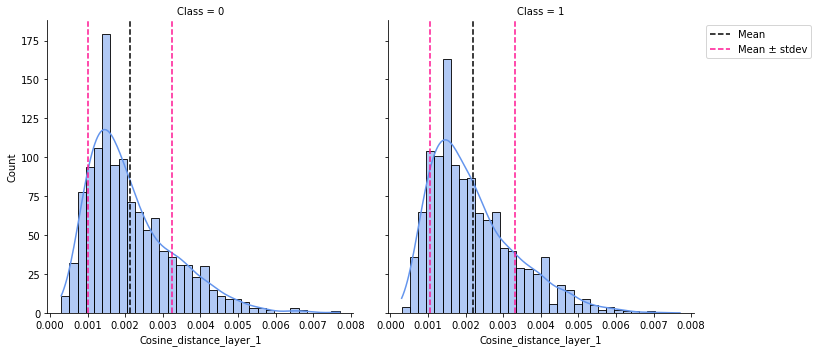

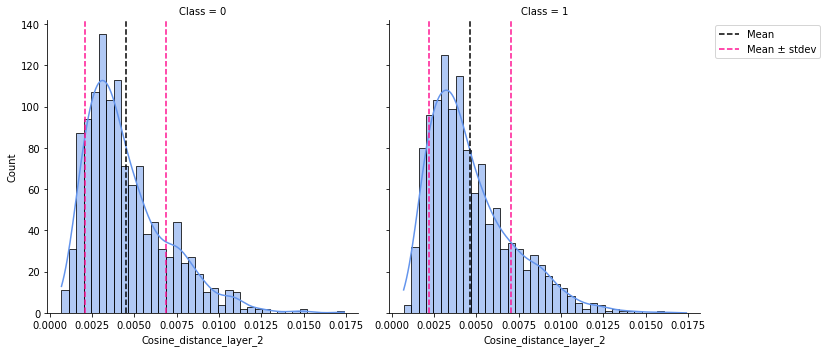

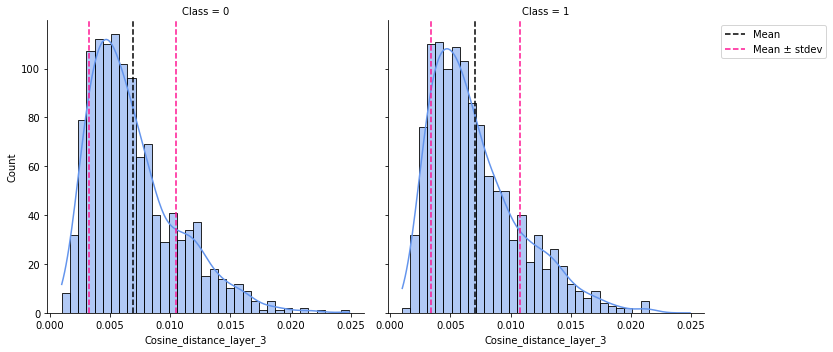

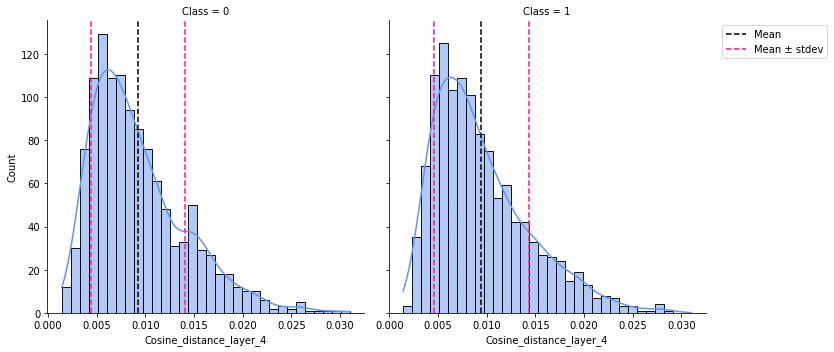

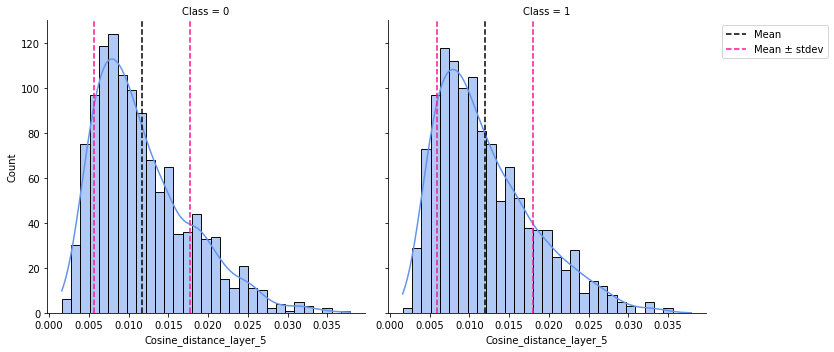

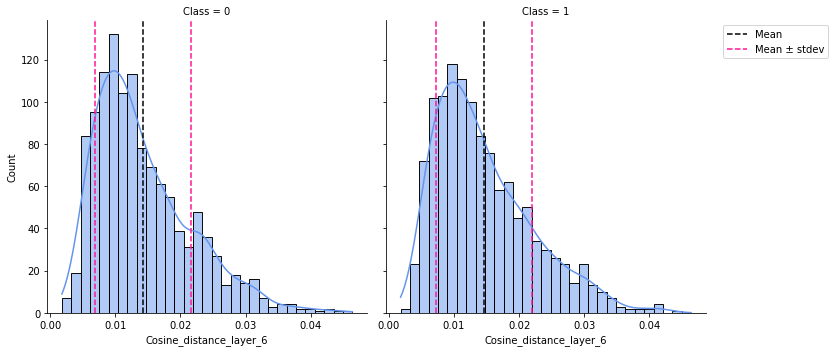

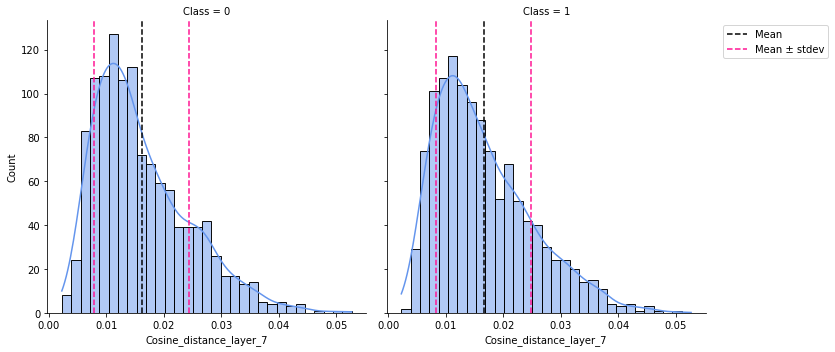

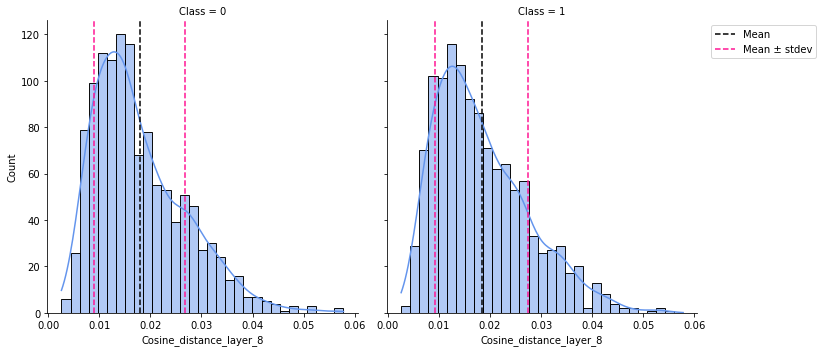

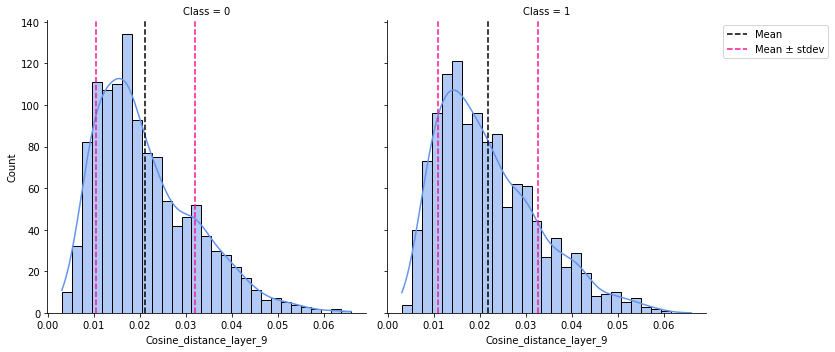

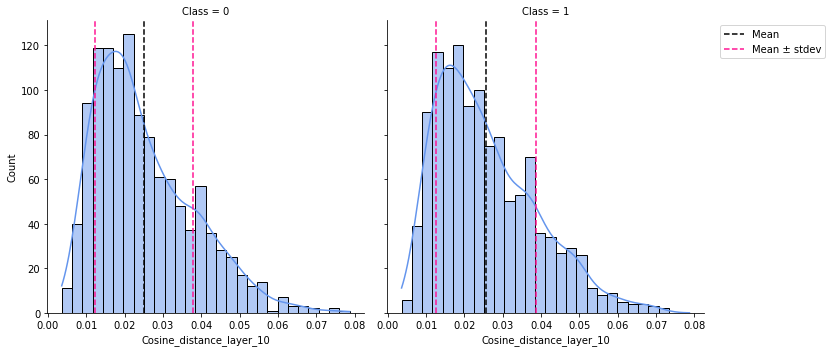

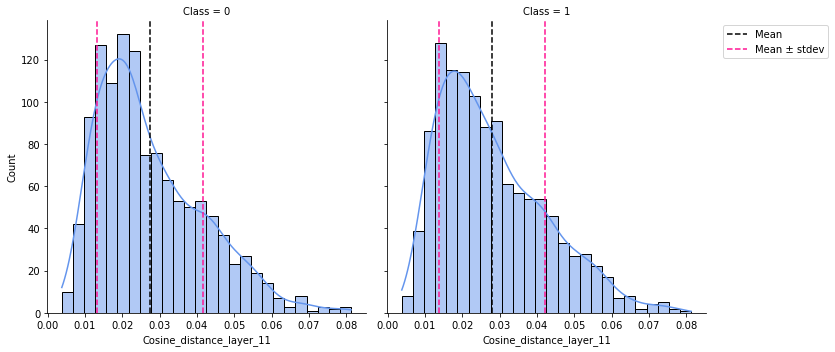

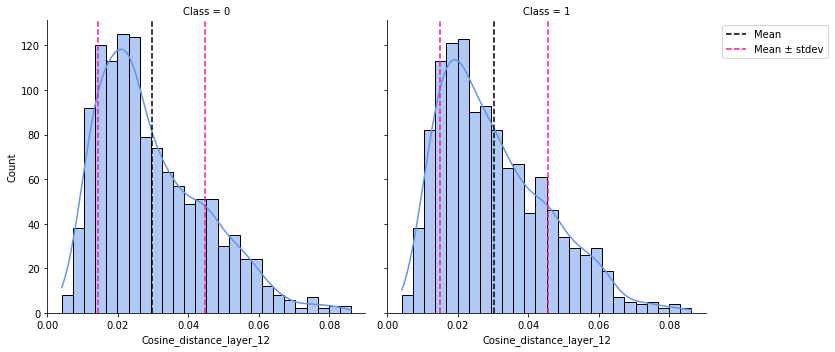

In [26]:
plot_mean_and_standard_deviation(df_dist_5_cosine_distance_no_pretrain, 'count', 'cornflowerblue')

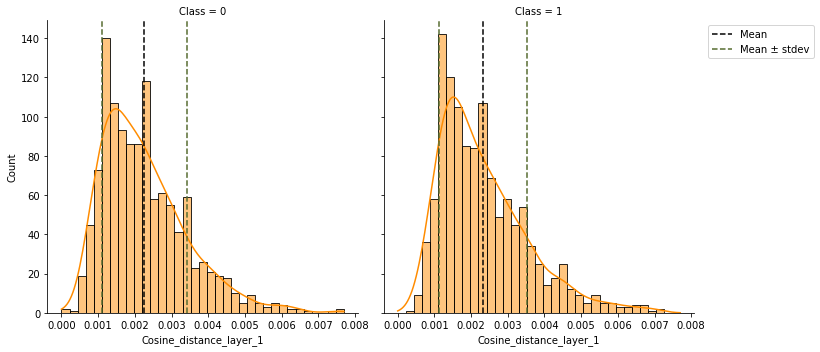

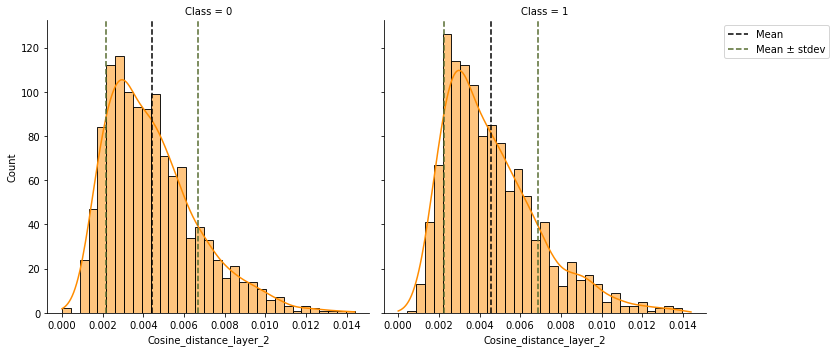

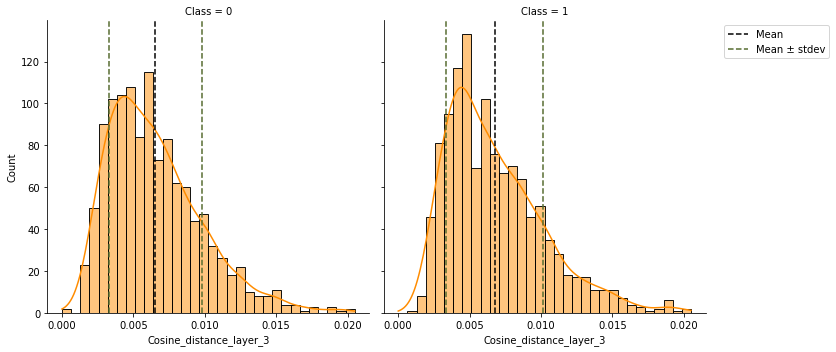

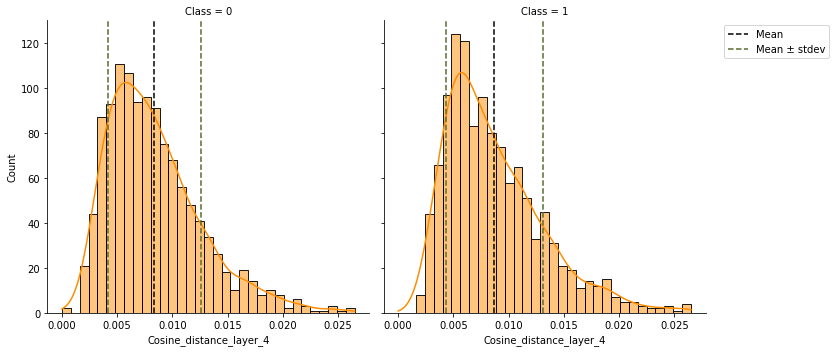

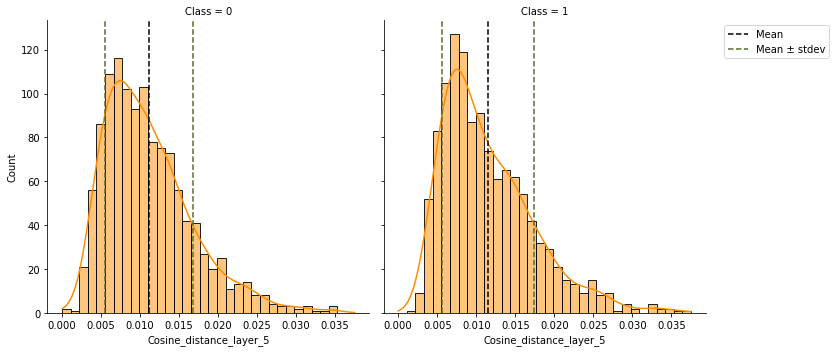

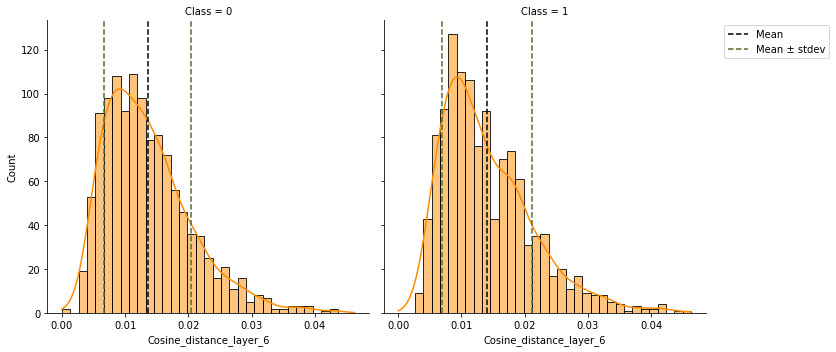

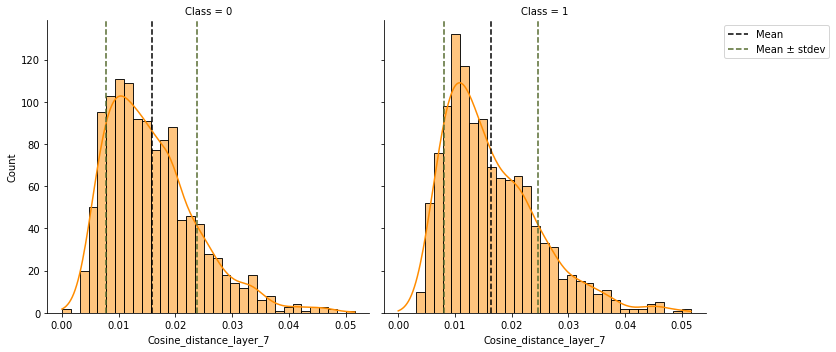

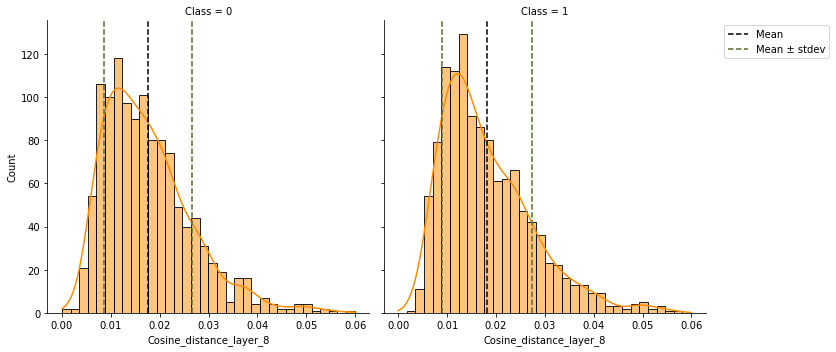

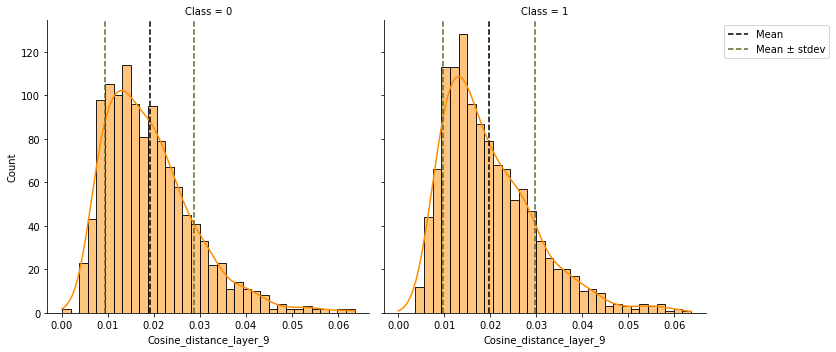

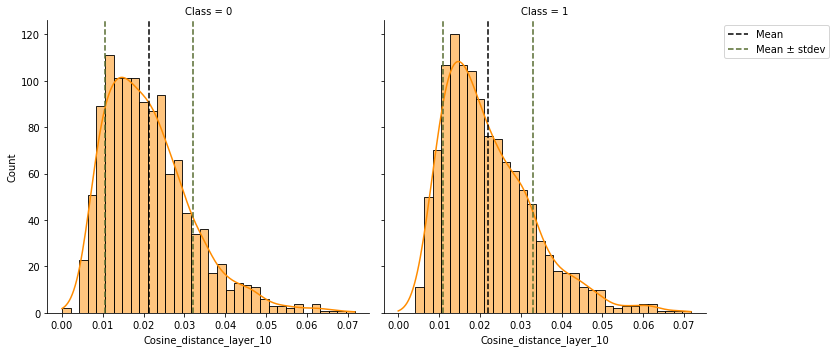

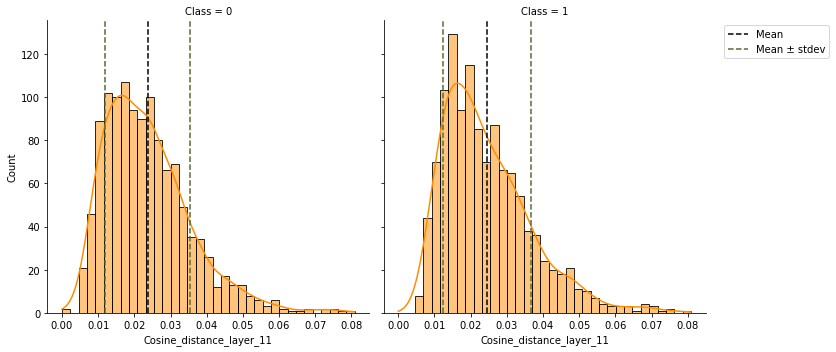

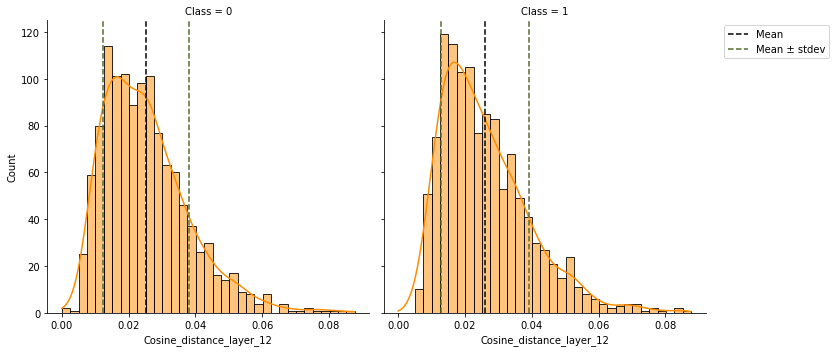

In [27]:
plot_mean_and_standard_deviation(df_dist_10_cosine_distance_no_pretrain, 'count', 'darkorange')

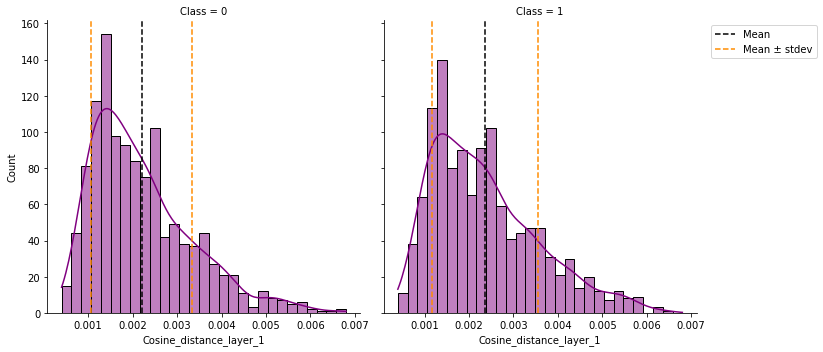

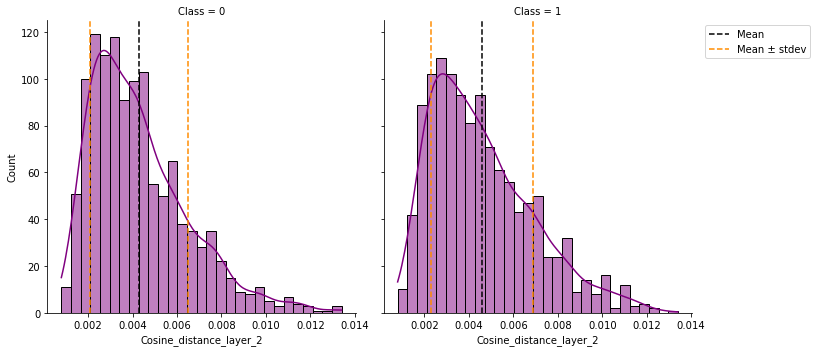

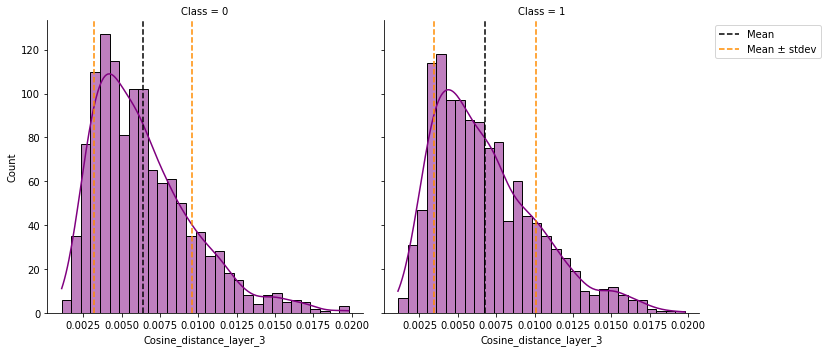

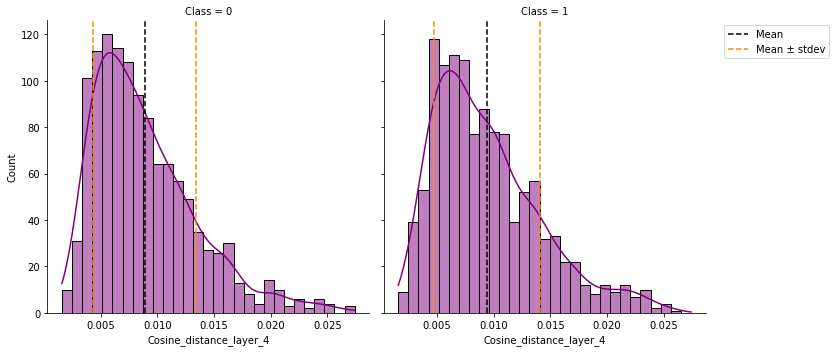

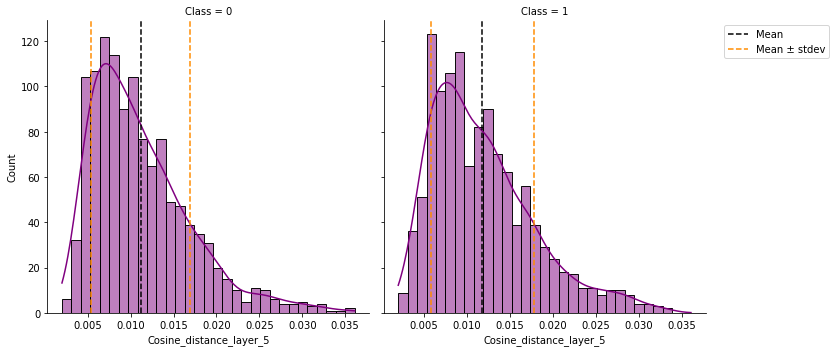

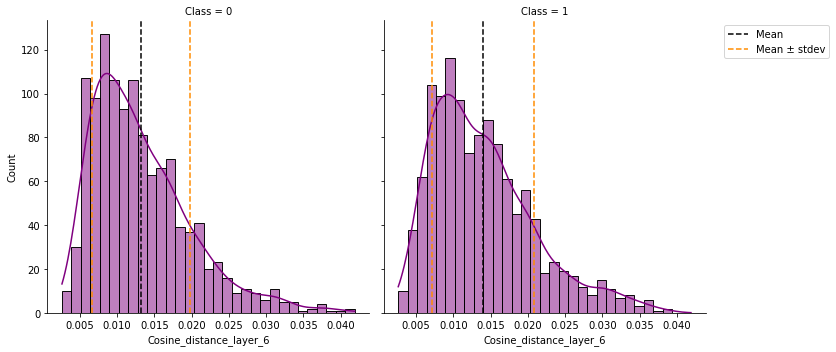

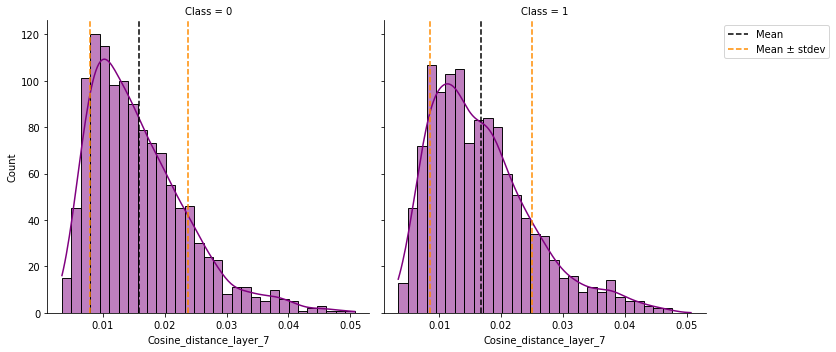

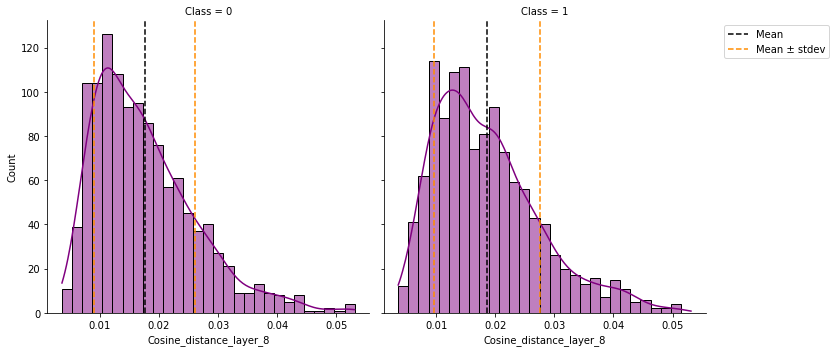

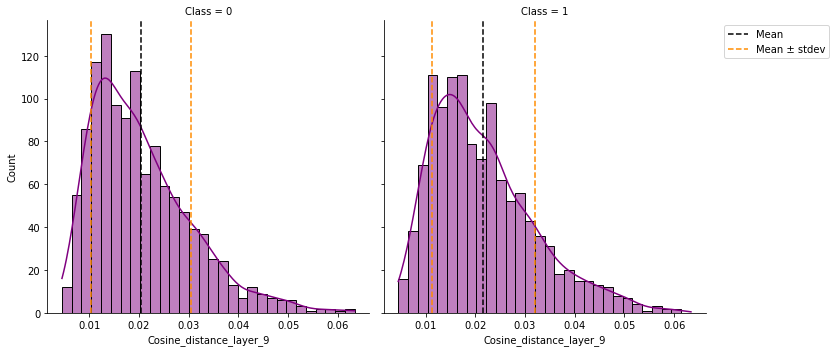

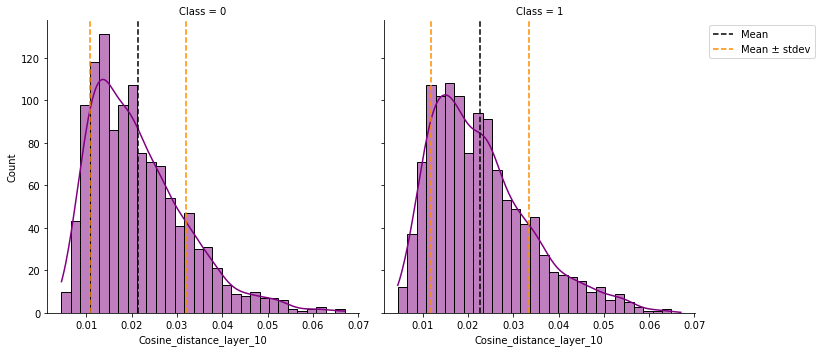

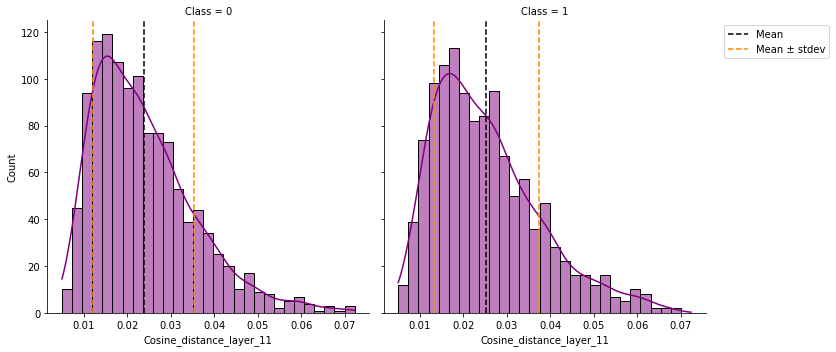

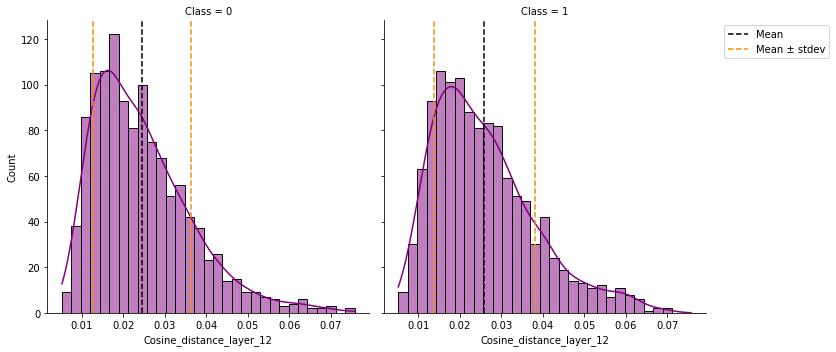

In [28]:
plot_mean_and_standard_deviation(df_dist_20_cosine_distance_no_pretrain, 'count', 'purple')

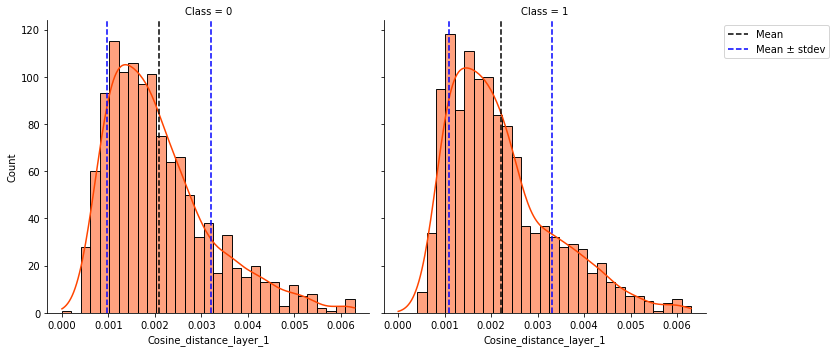

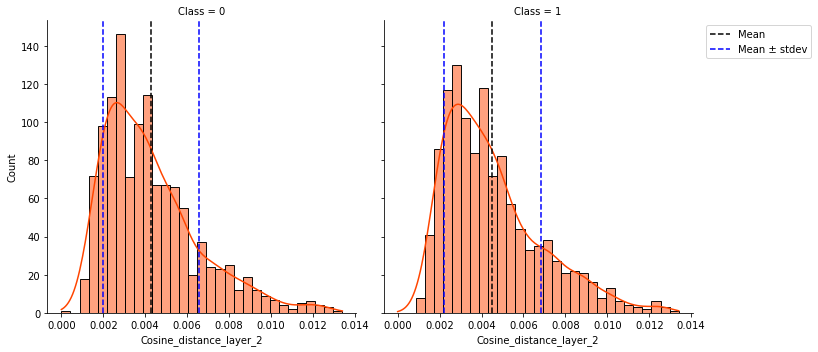

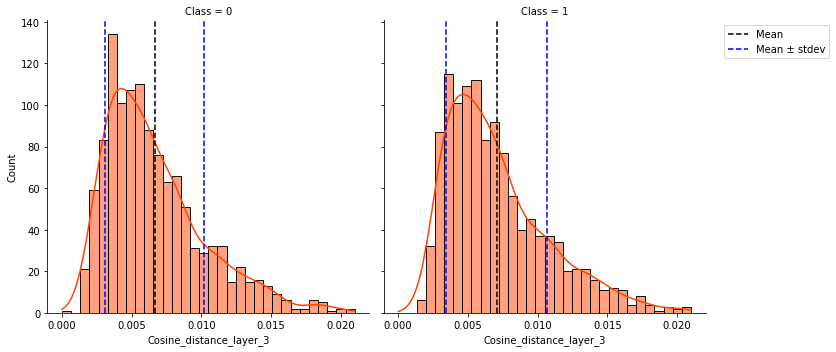

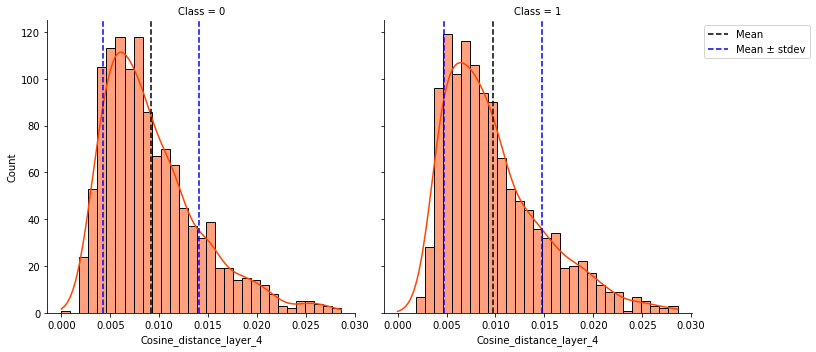

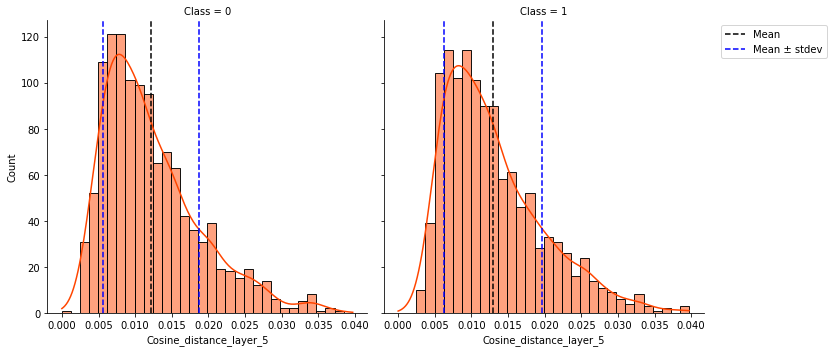

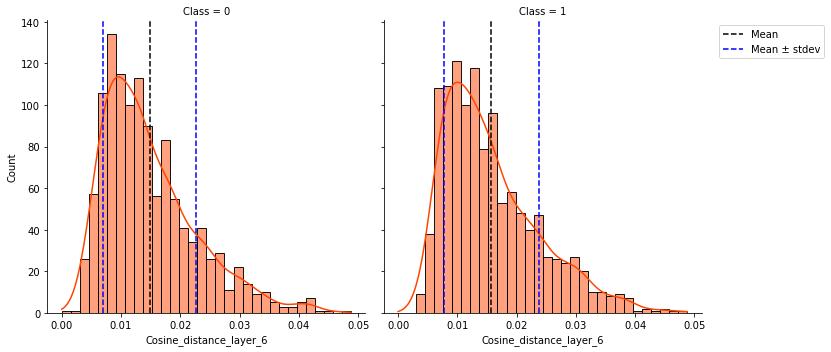

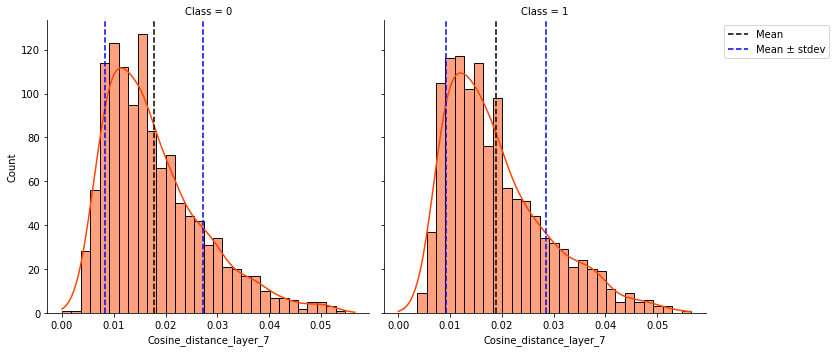

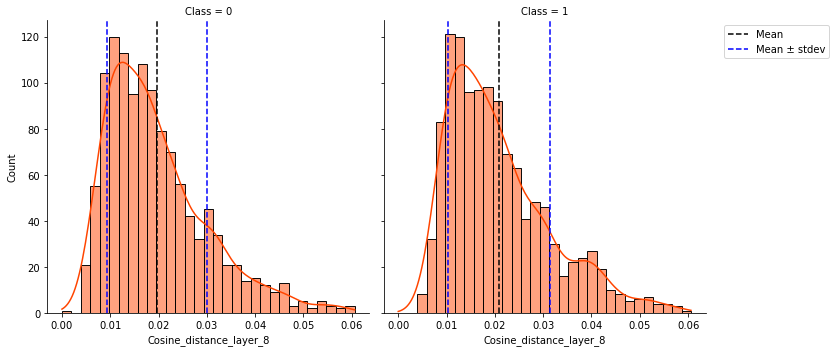

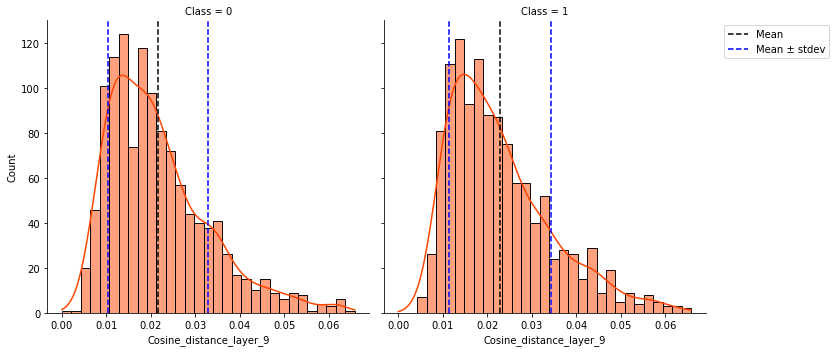

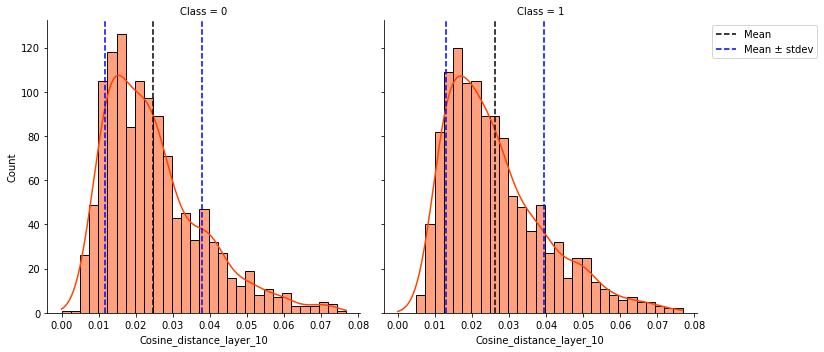

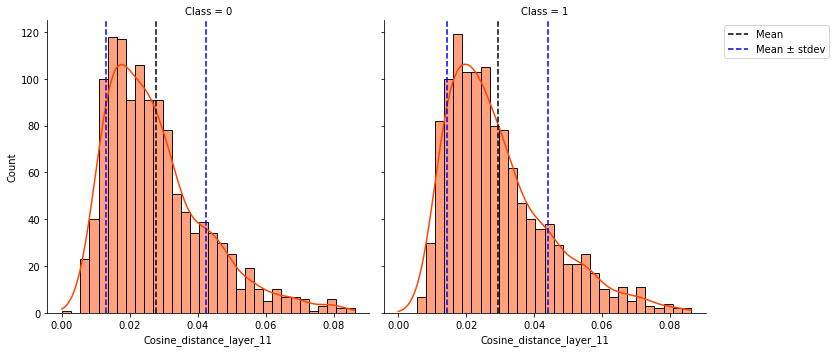

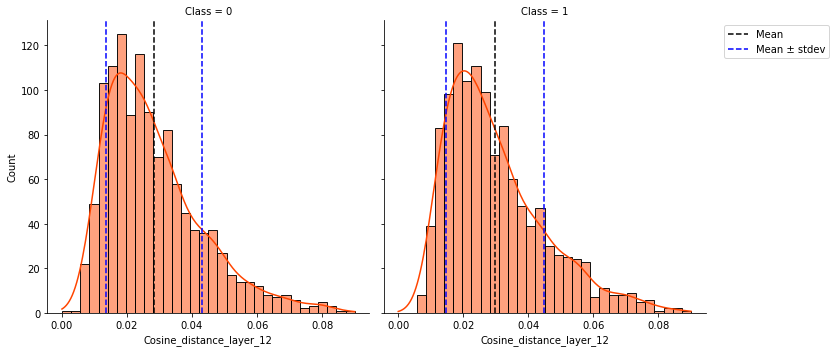

In [29]:
plot_mean_and_standard_deviation(df_dist_30_cosine_distance_no_pretrain, 'count', 'orangered')

### Density

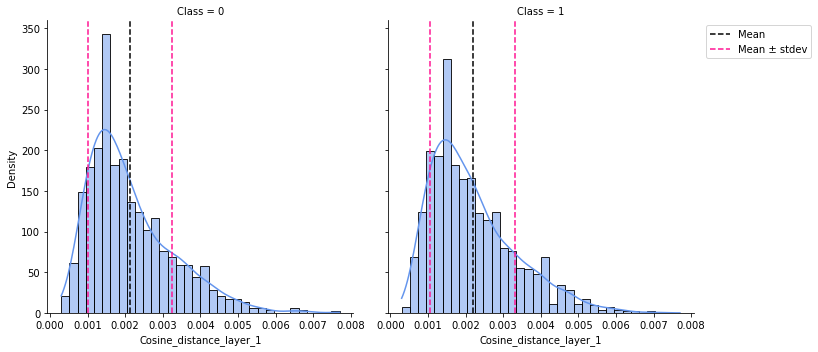

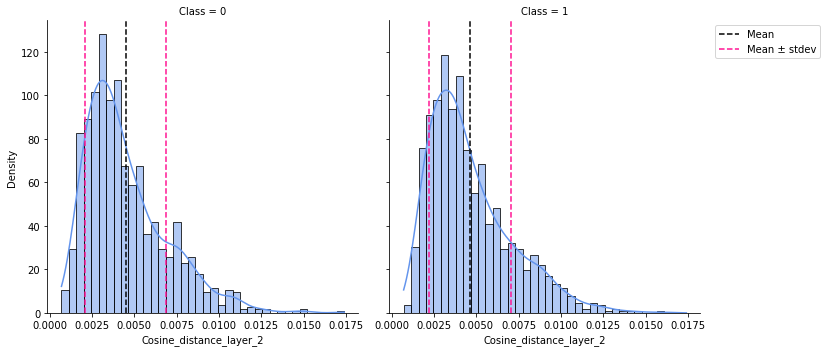

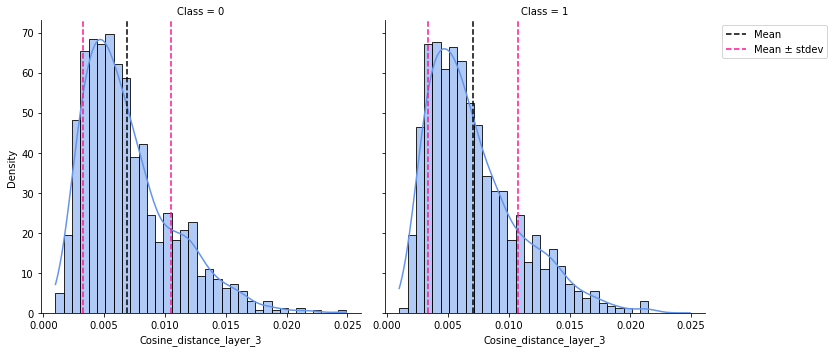

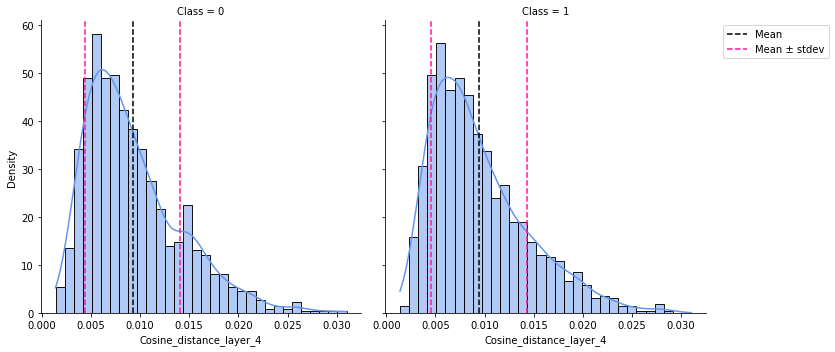

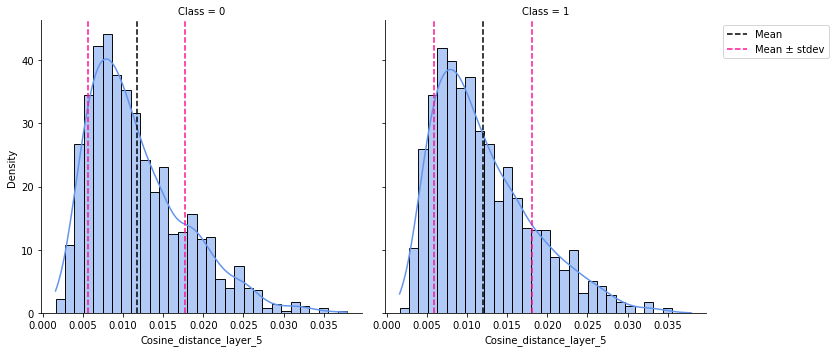

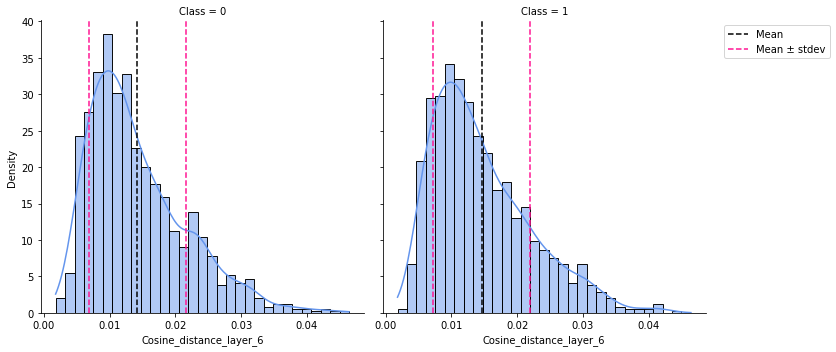

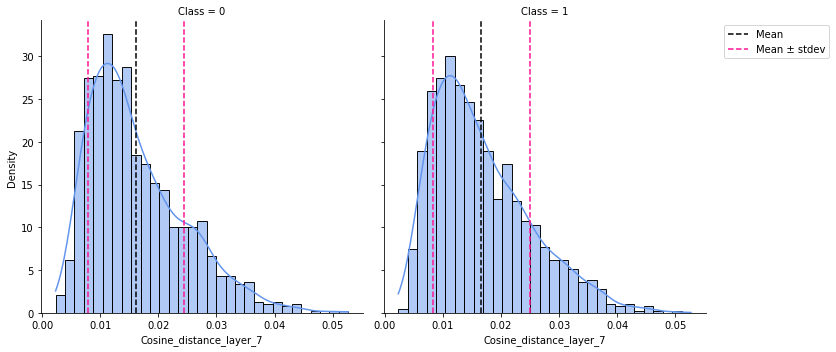

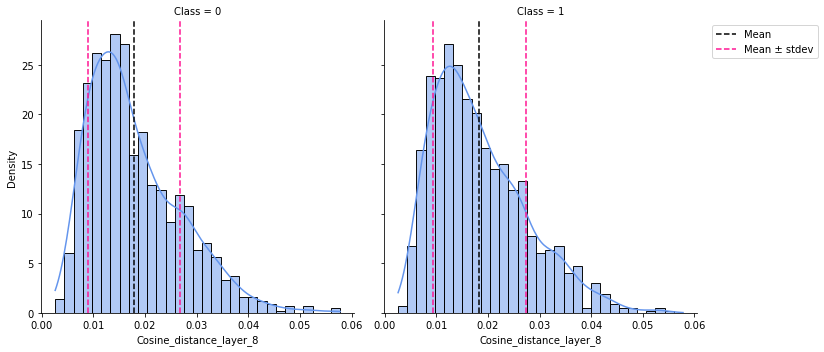

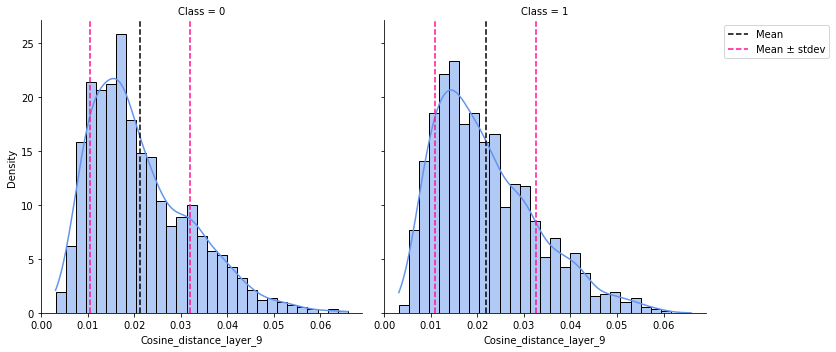

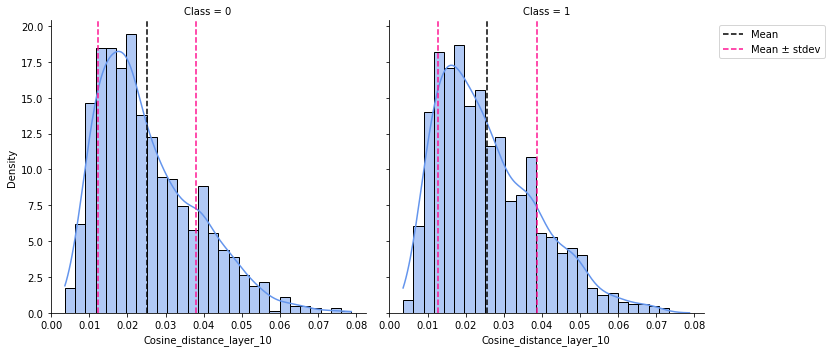

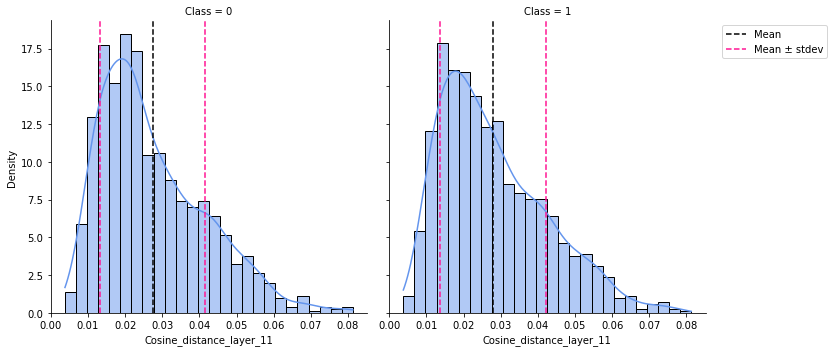

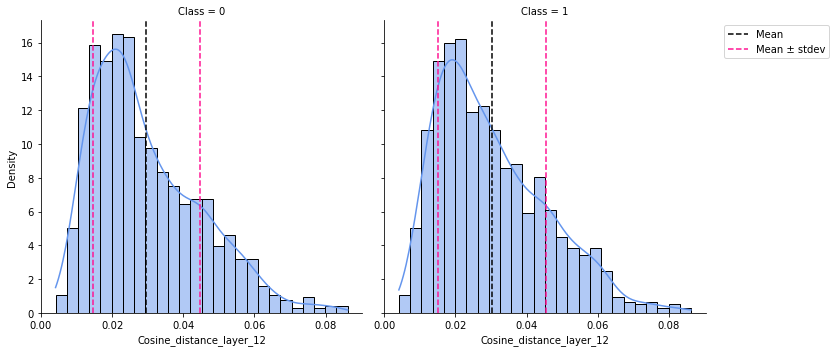

In [30]:
plot_mean_and_standard_deviation(df_dist_5_cosine_distance_no_pretrain, 'density', 'cornflowerblue')

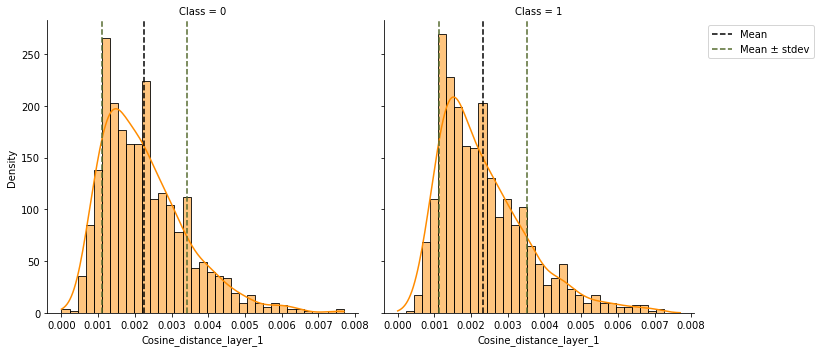

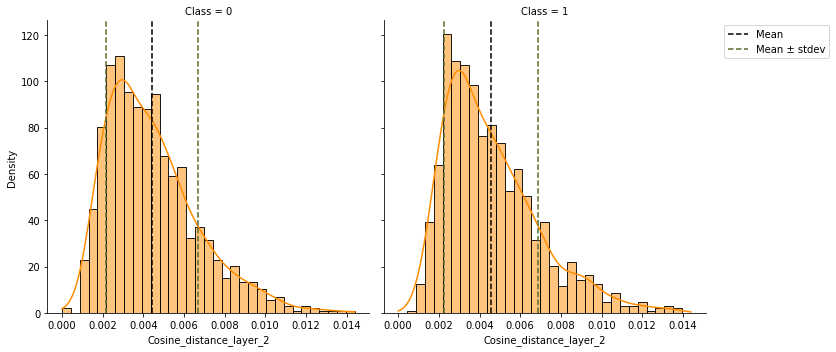

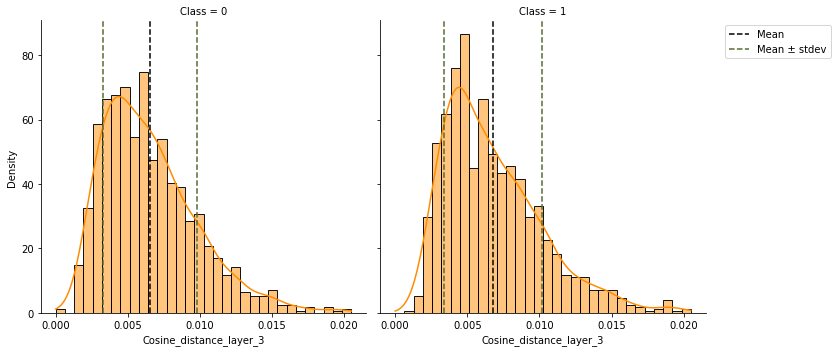

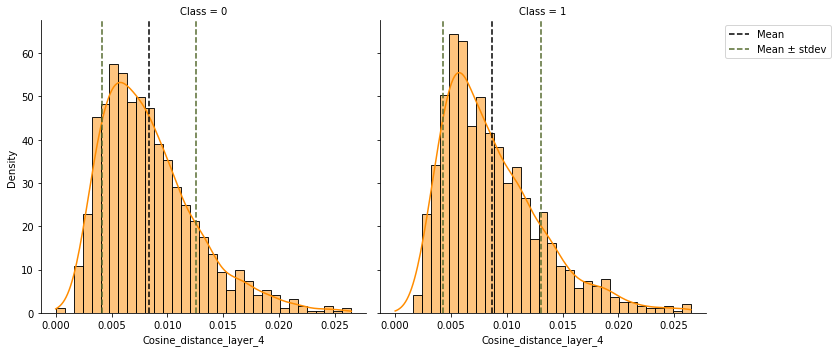

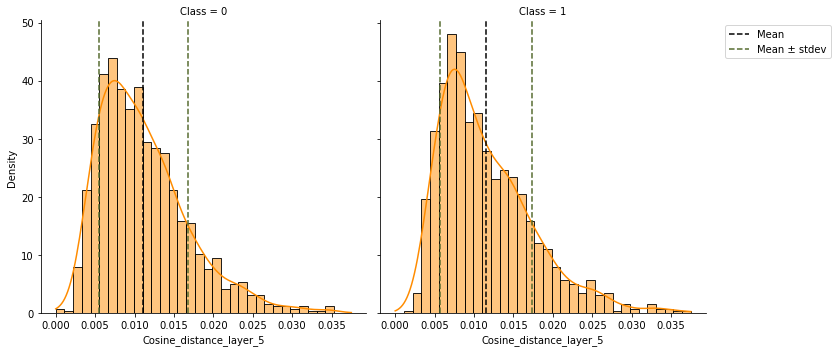

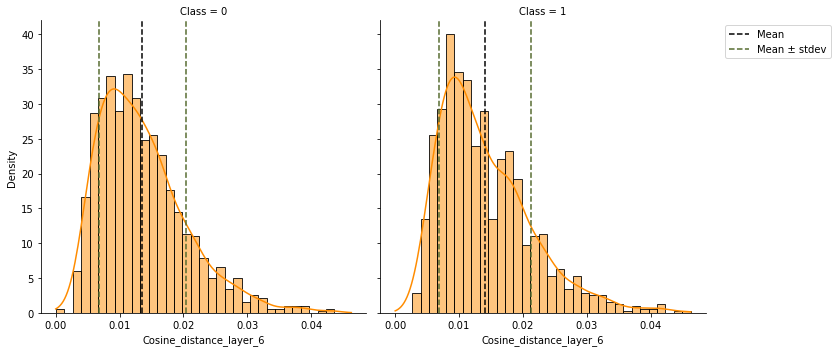

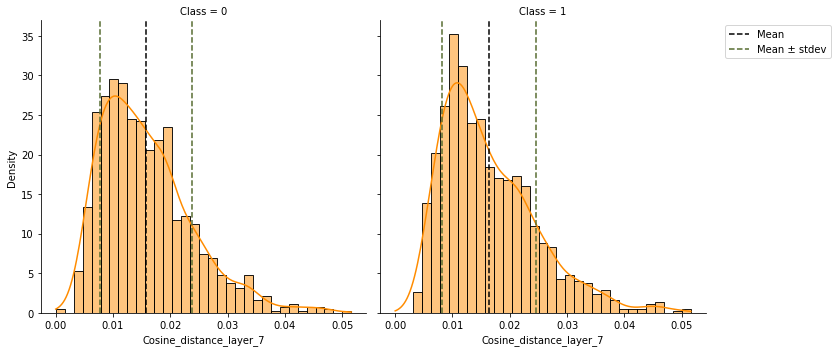

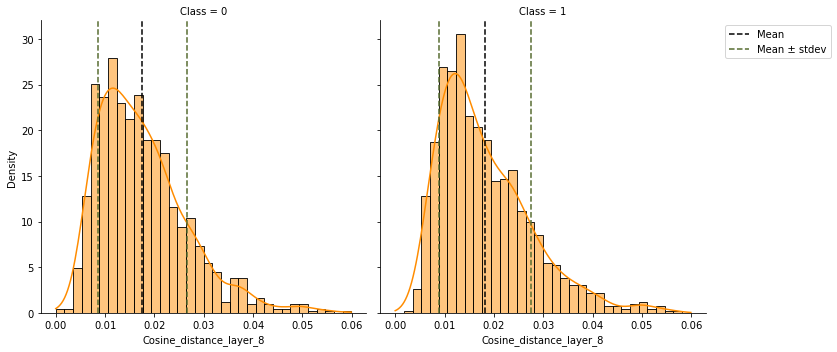

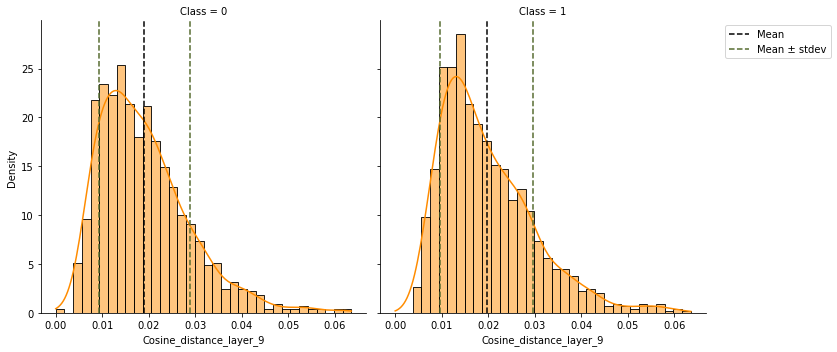

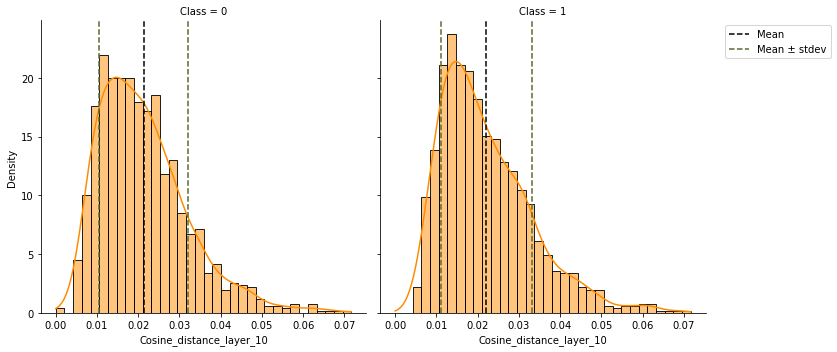

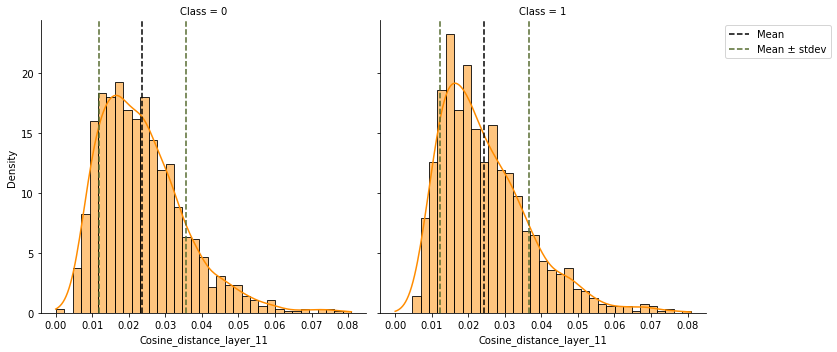

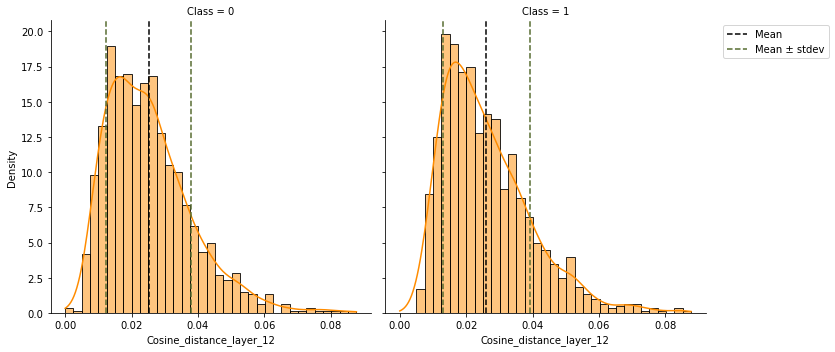

In [31]:
plot_mean_and_standard_deviation(df_dist_10_cosine_distance_no_pretrain, 'density', 'darkorange')

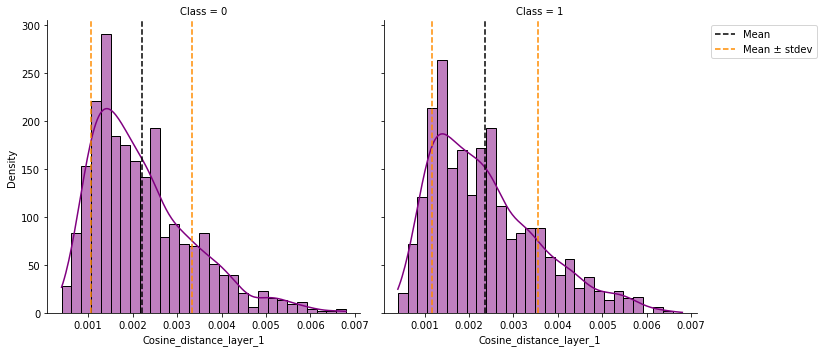

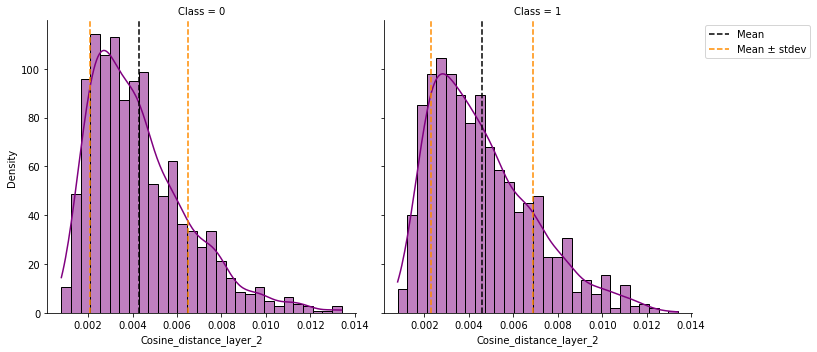

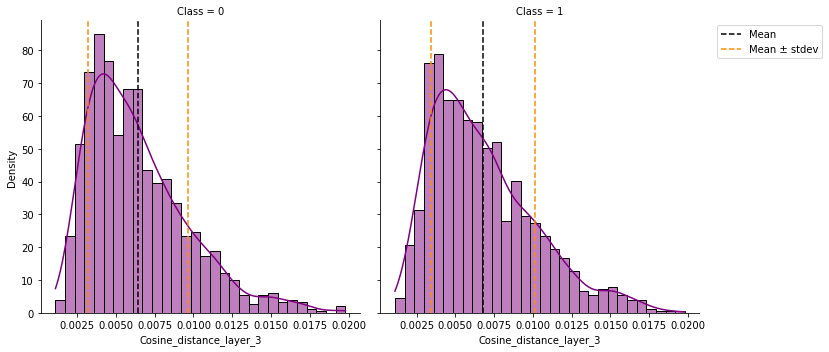

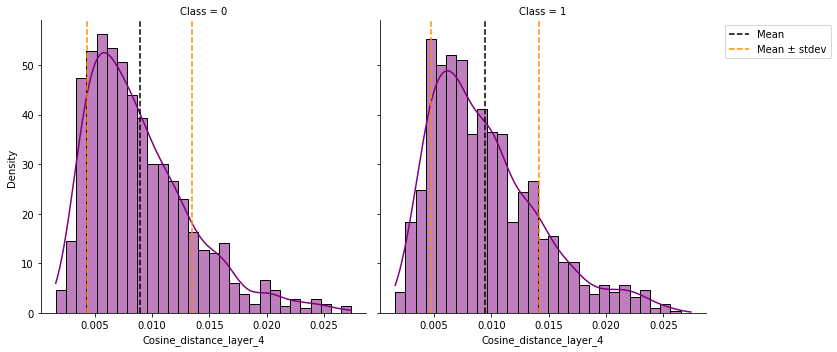

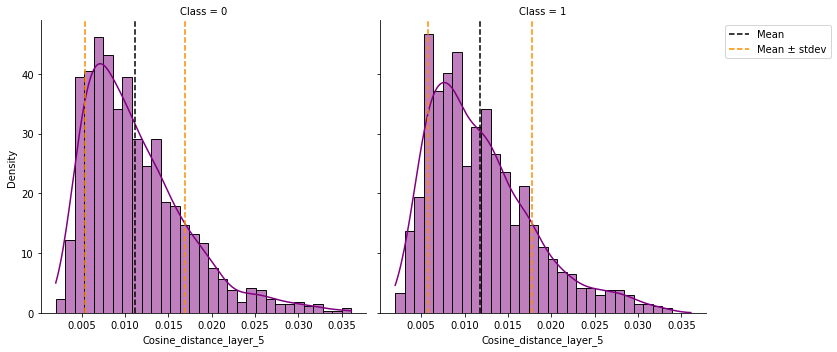

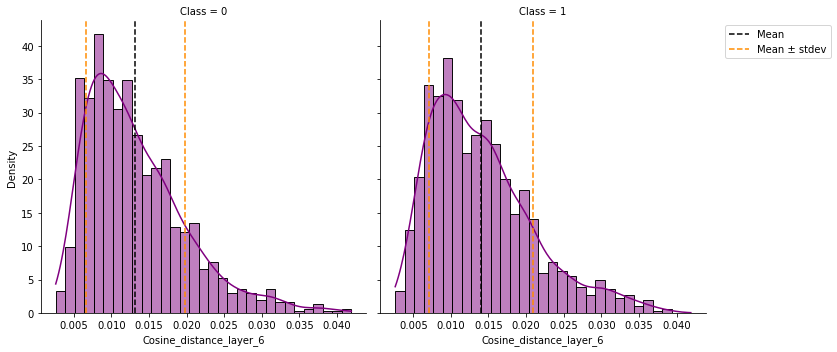

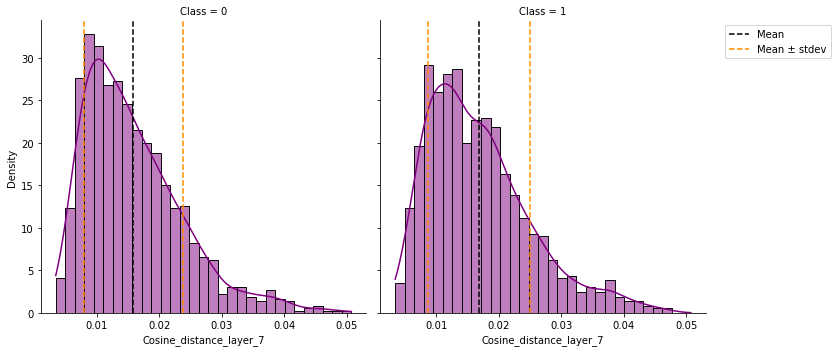

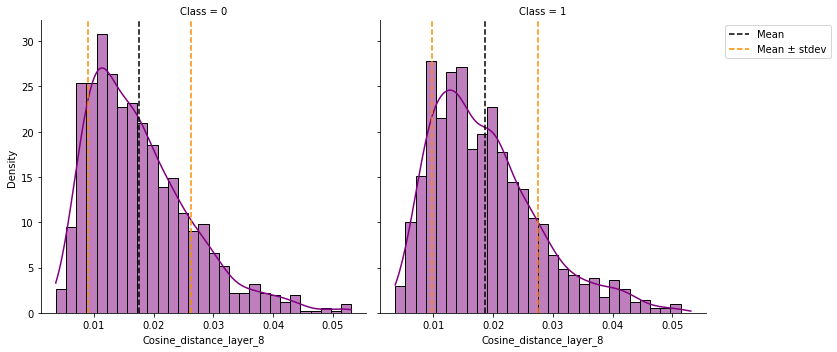

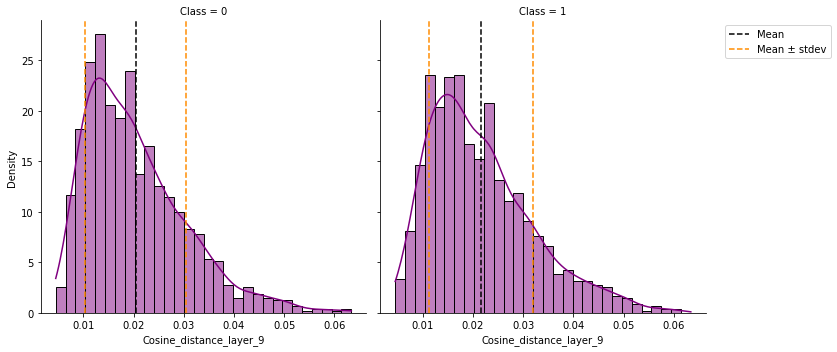

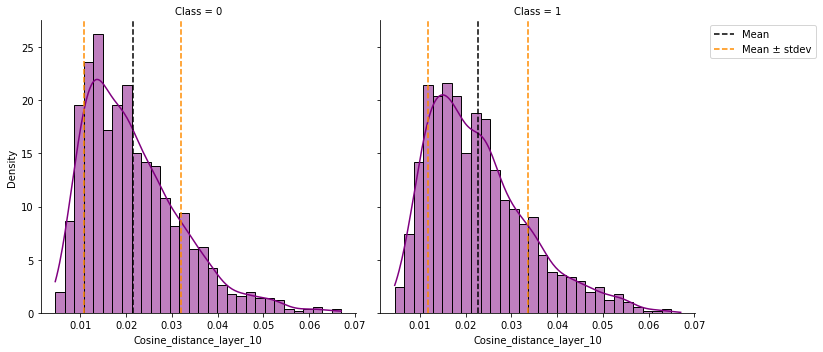

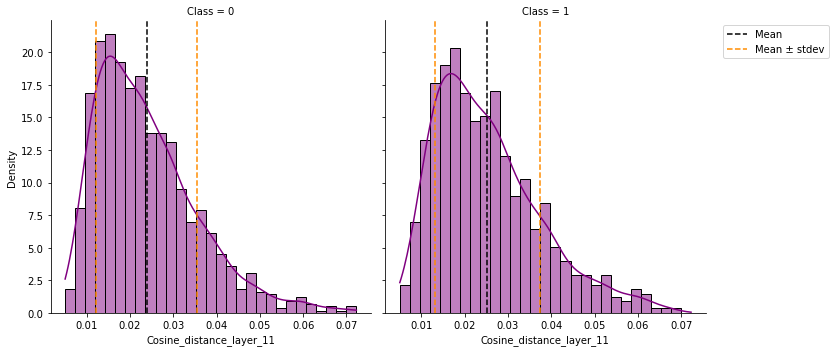

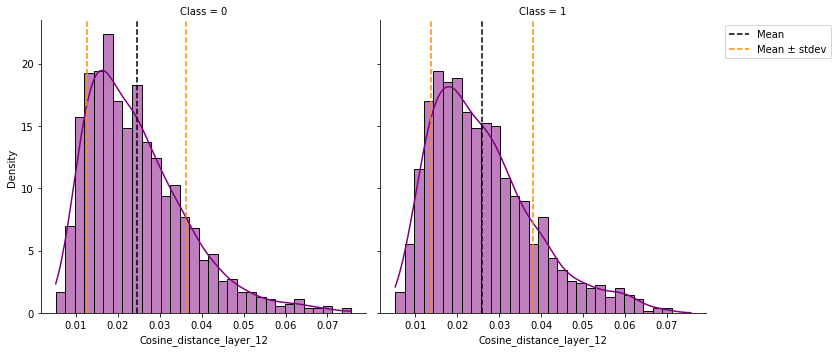

In [32]:
plot_mean_and_standard_deviation(df_dist_20_cosine_distance_no_pretrain, 'density', 'purple')

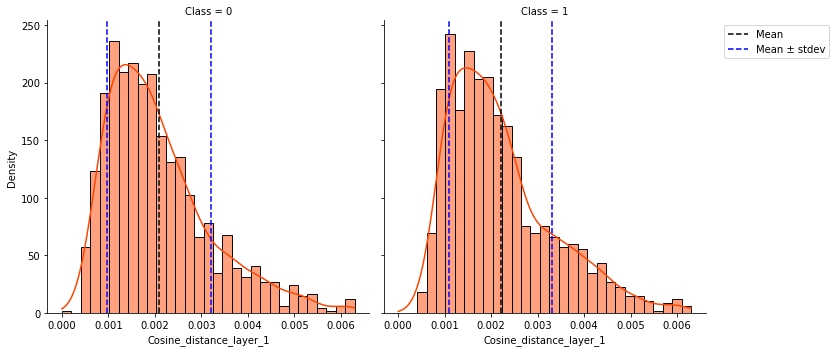

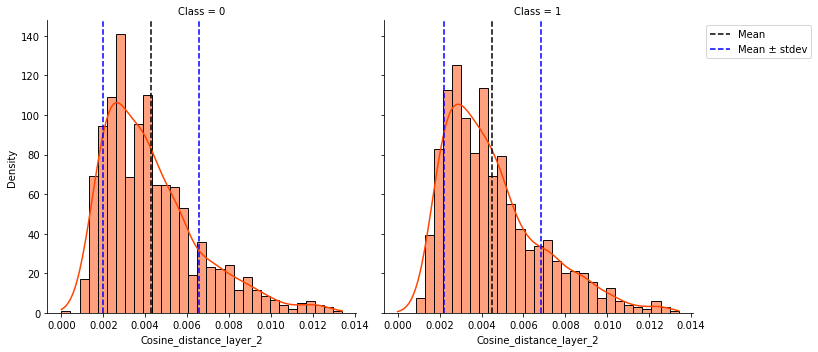

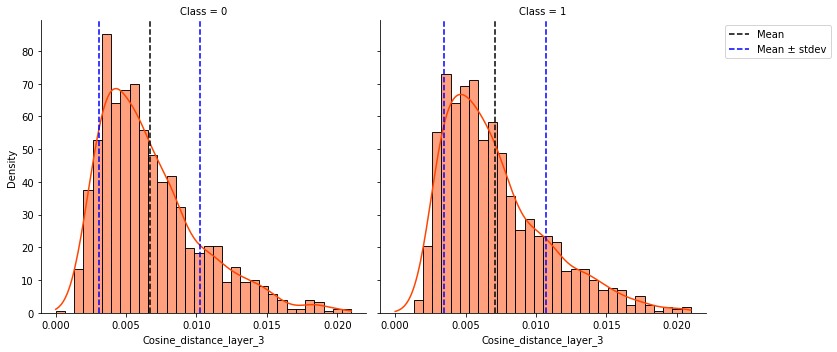

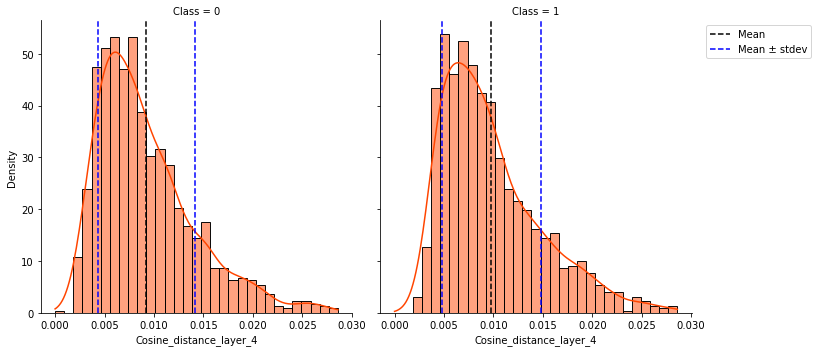

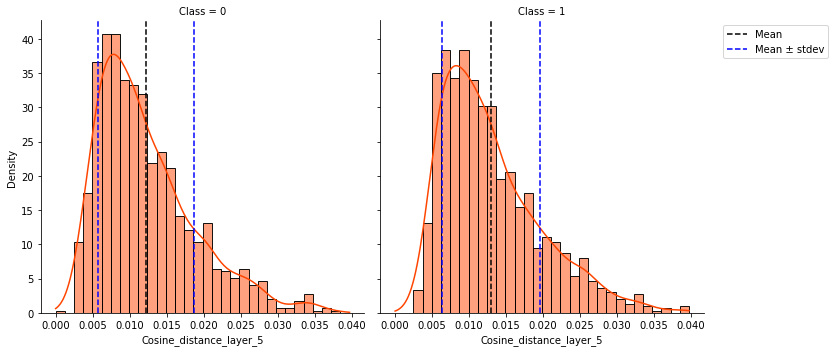

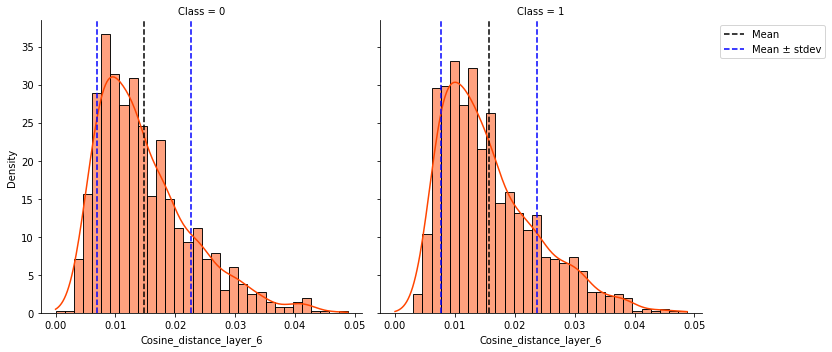

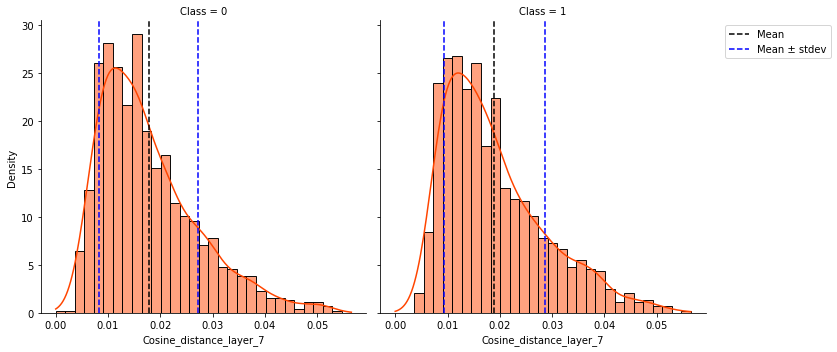

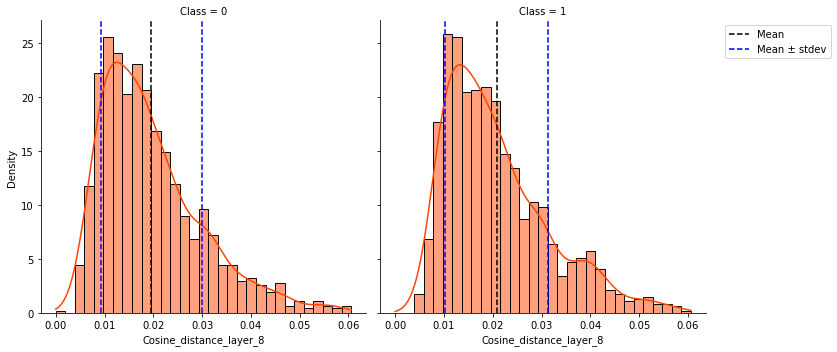

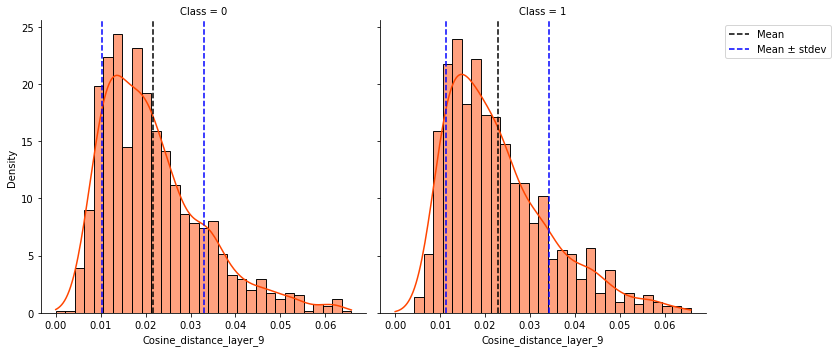

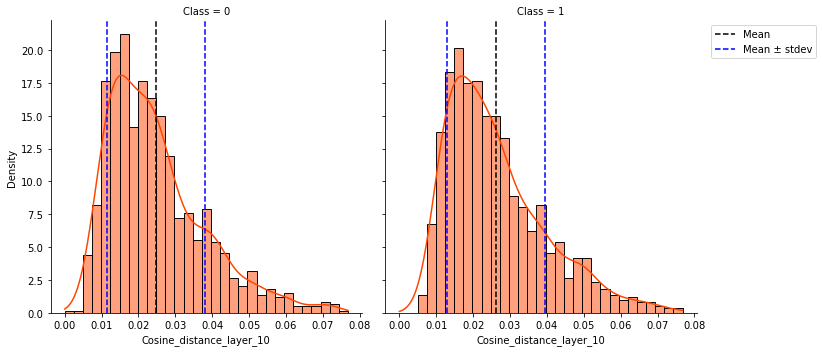

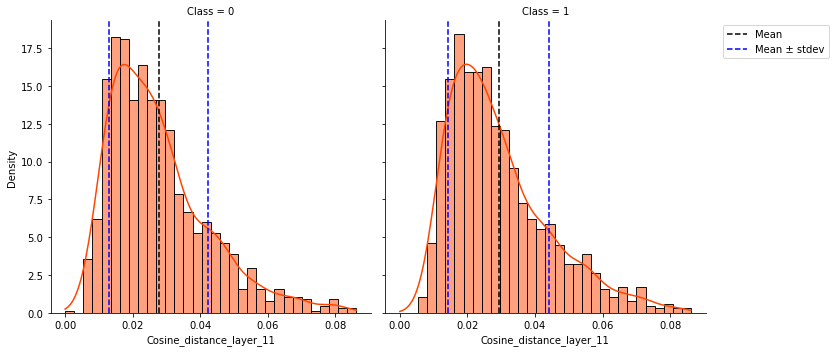

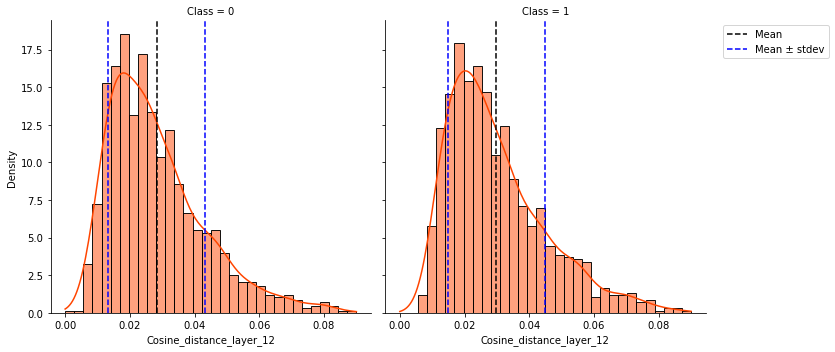

In [33]:
plot_mean_and_standard_deviation(df_dist_30_cosine_distance_no_pretrain, 'density', 'orangered')

In [34]:
#sns.displot(data=df_dist_5_cosine_distance, x=df_dist_5_cosine_distance['Cosine_distance_layer_1'], \
#            kind='kde', hue='Class')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0021
StDev: 0.0011
Mean: 0.0022
StDev: 0.0011


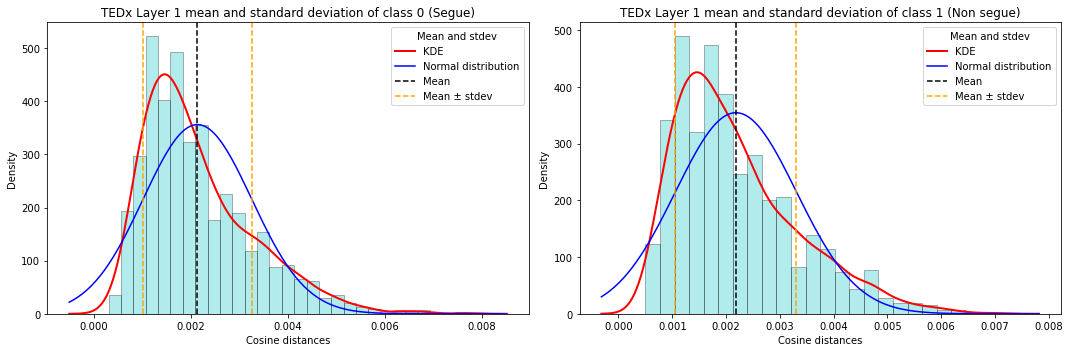

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0045
StDev: 0.0024
Mean: 0.0046
StDev: 0.0024


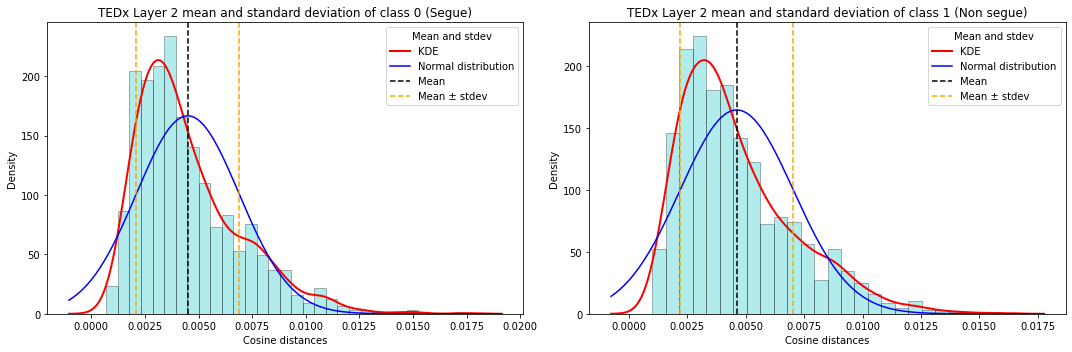

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0069
StDev: 0.0036
Mean: 0.0070
StDev: 0.0037


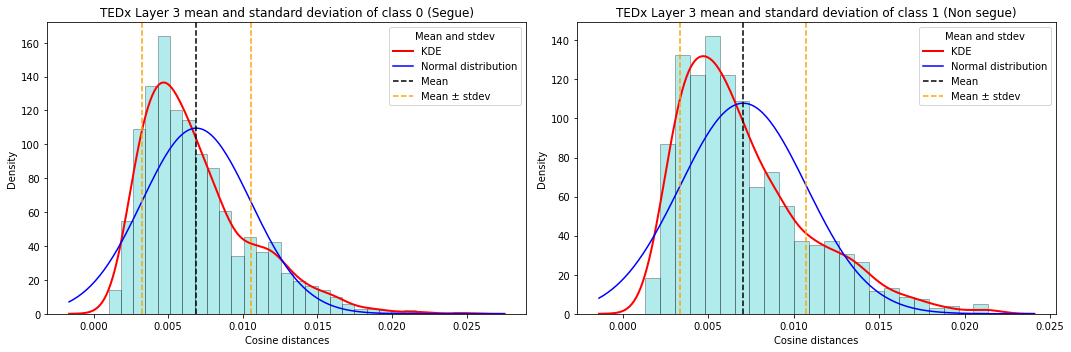

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0093
StDev: 0.0048
Mean: 0.0095
StDev: 0.0049


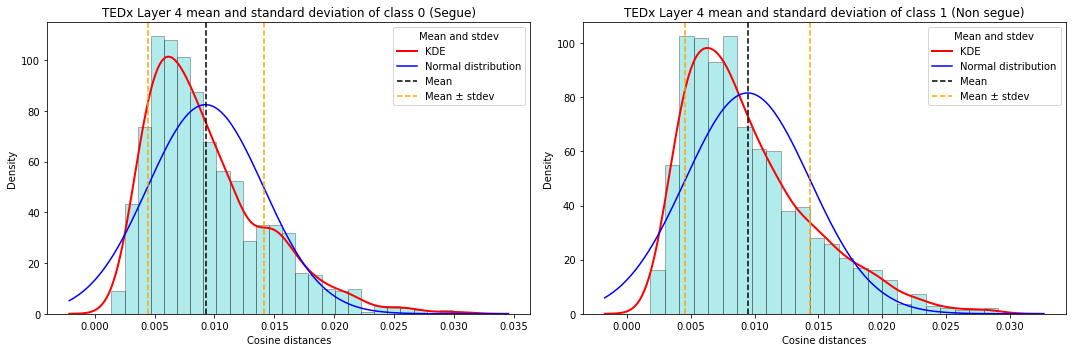

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0117
StDev: 0.0060
Mean: 0.0120
StDev: 0.0061


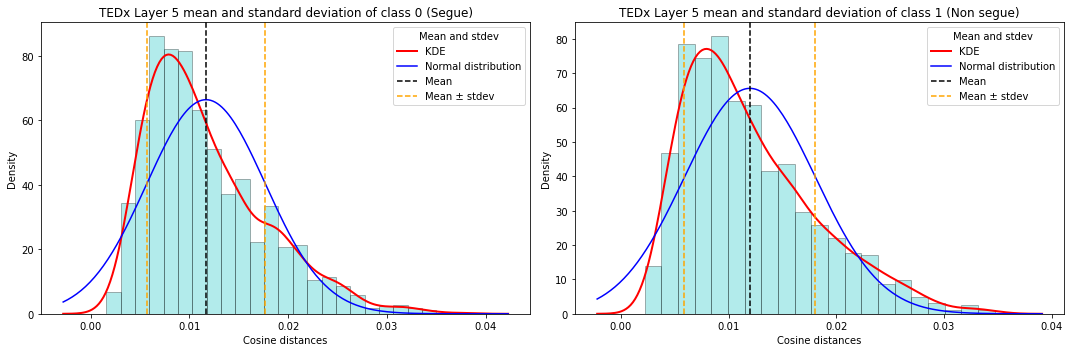

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0142
StDev: 0.0074
Mean: 0.0146
StDev: 0.0074


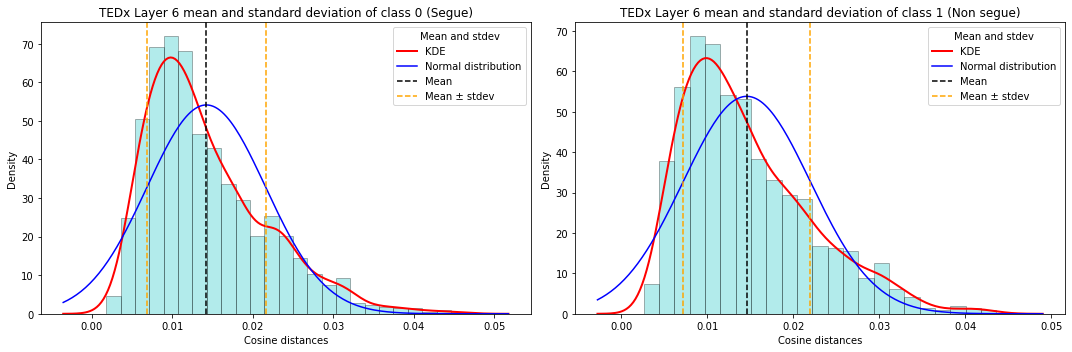

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0162
StDev: 0.0082
Mean: 0.0166
StDev: 0.0083


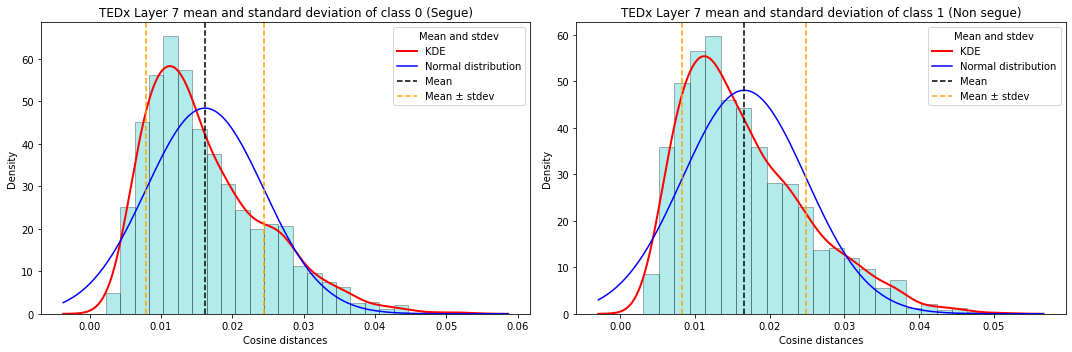

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0179
StDev: 0.0090
Mean: 0.0184
StDev: 0.0090


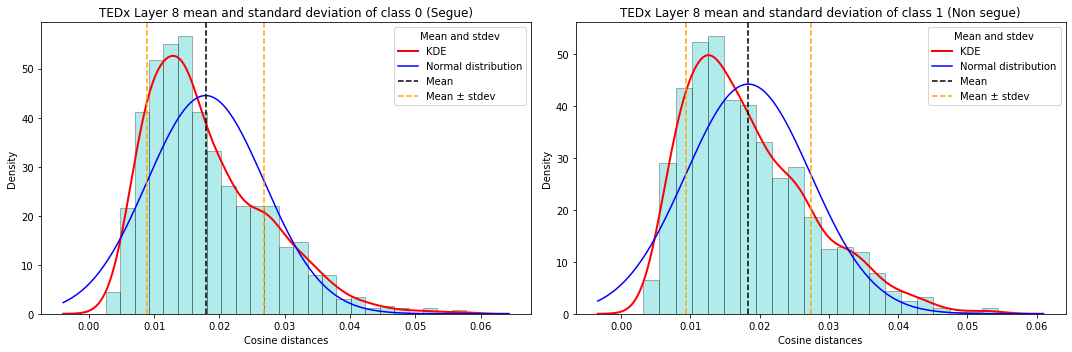

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0213
StDev: 0.0108
Mean: 0.0218
StDev: 0.0108


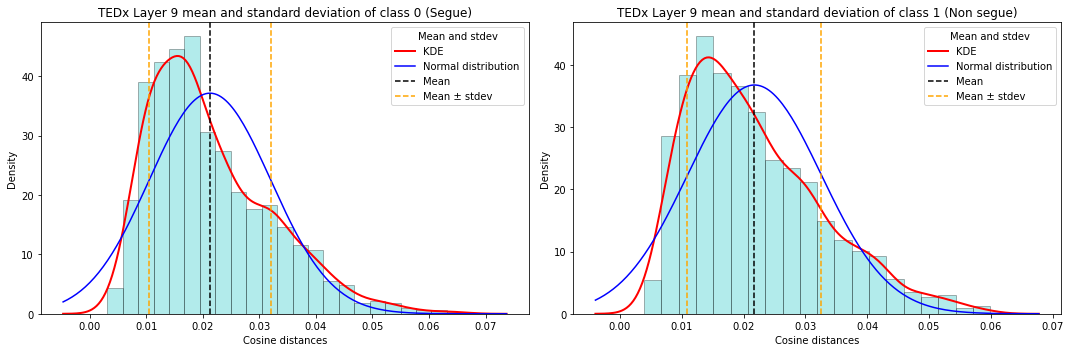

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0251
StDev: 0.0128
Mean: 0.0257
StDev: 0.0130


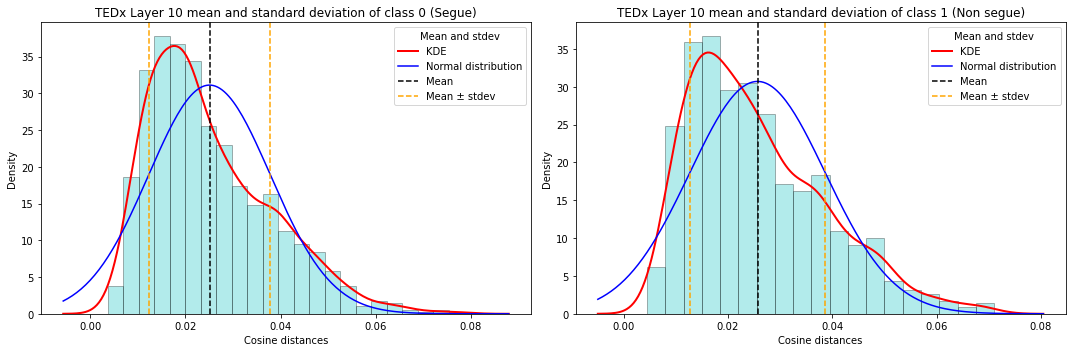

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0274
StDev: 0.0141
Mean: 0.0280
StDev: 0.0142


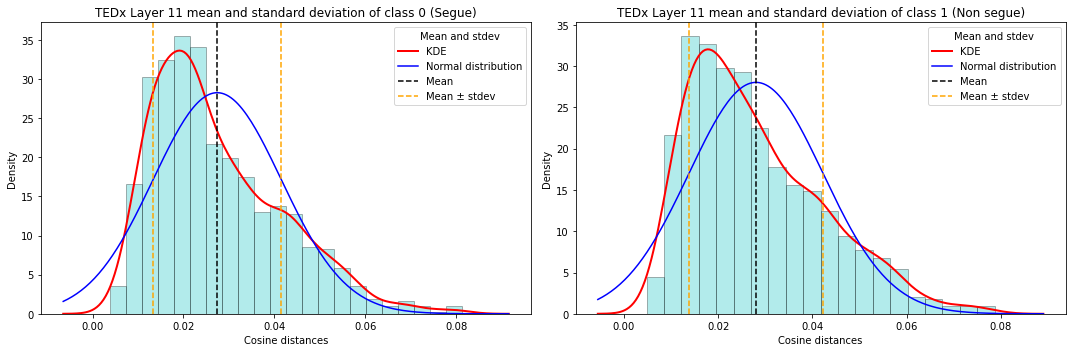

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0296
StDev: 0.0152
Mean: 0.0303
StDev: 0.0153


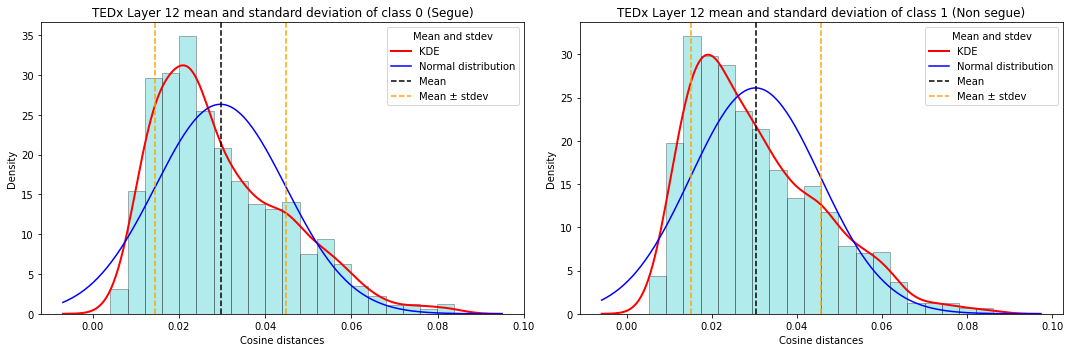

In [35]:
plot_mean_and_stdev(df_dist_5_cosine_distance_no_pretrain)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0023
StDev: 0.0012
Mean: 0.0023
StDev: 0.0012


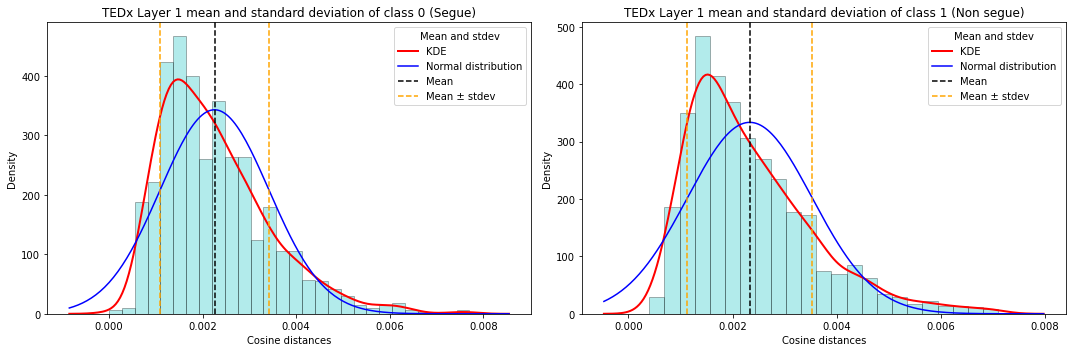

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0044
StDev: 0.0022
Mean: 0.0046
StDev: 0.0023


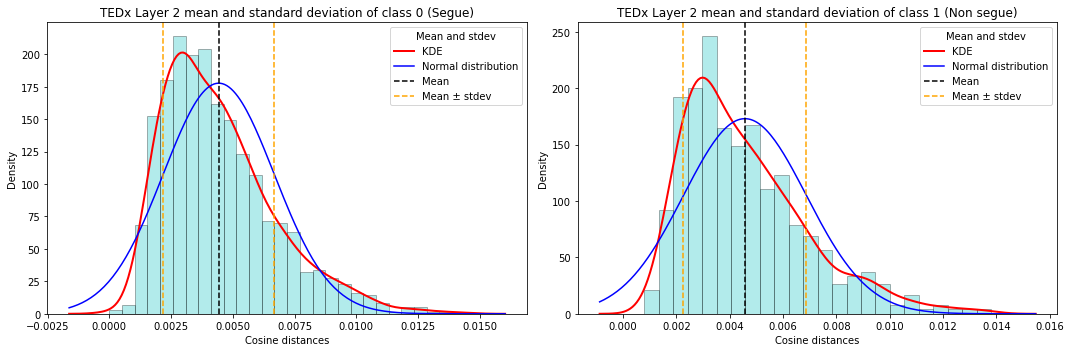

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0065
StDev: 0.0033
Mean: 0.0068
StDev: 0.0034


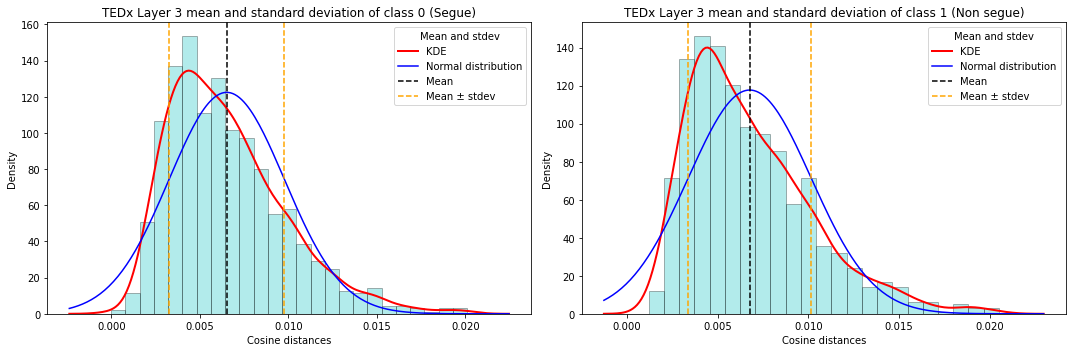

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0084
StDev: 0.0042
Mean: 0.0087
StDev: 0.0044


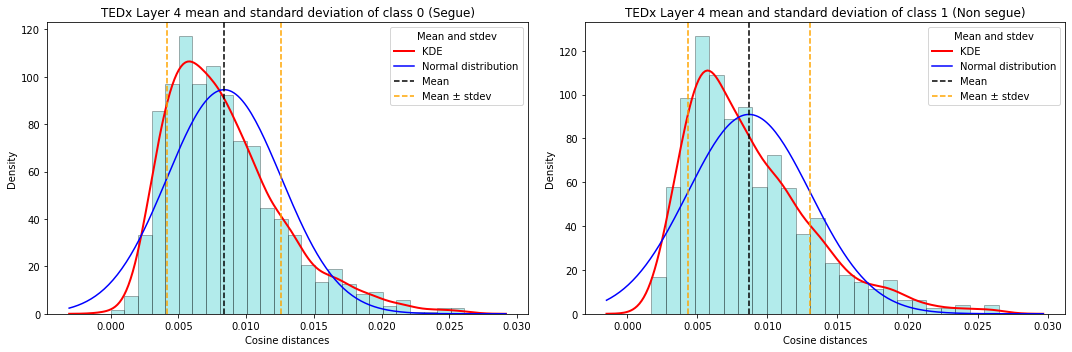

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0111
StDev: 0.0056
Mean: 0.0115
StDev: 0.0058


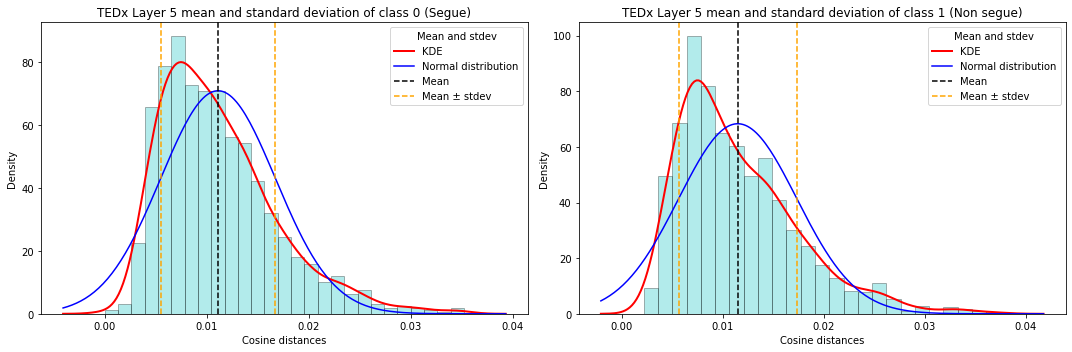

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0136
StDev: 0.0069
Mean: 0.0141
StDev: 0.0072


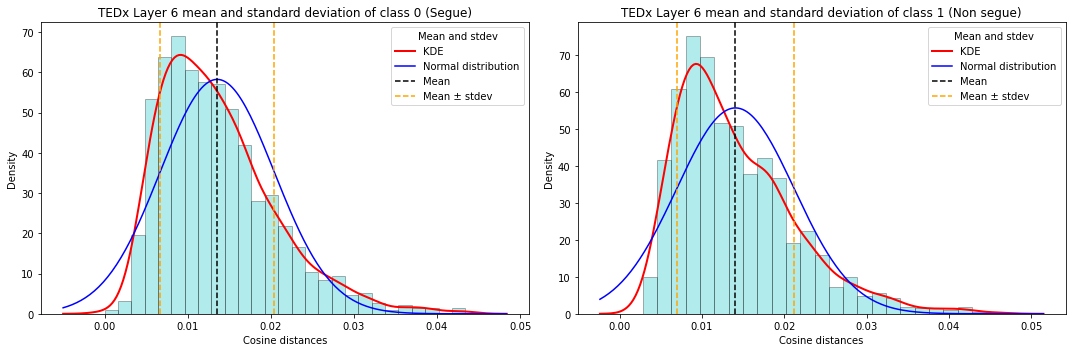

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0158
StDev: 0.0080
Mean: 0.0164
StDev: 0.0083


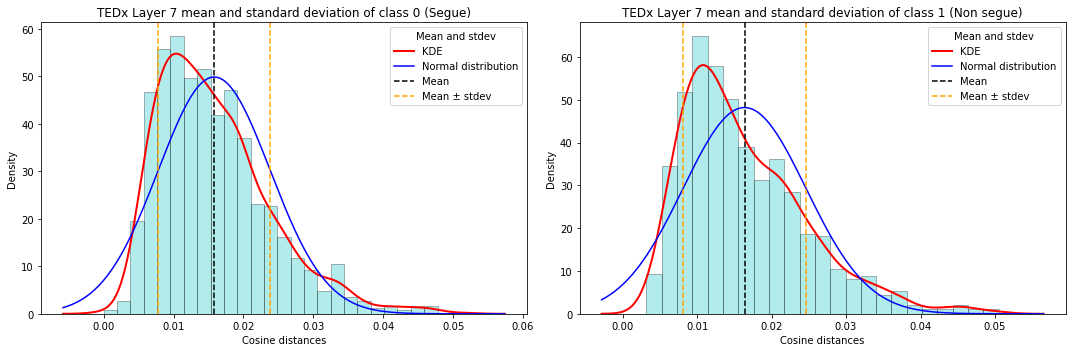

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0176
StDev: 0.0090
Mean: 0.0182
StDev: 0.0093


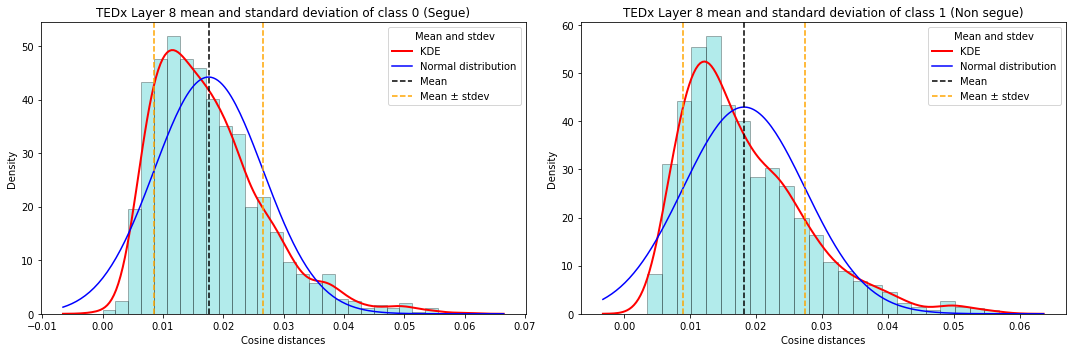

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0191
StDev: 0.0097
Mean: 0.0197
StDev: 0.0100


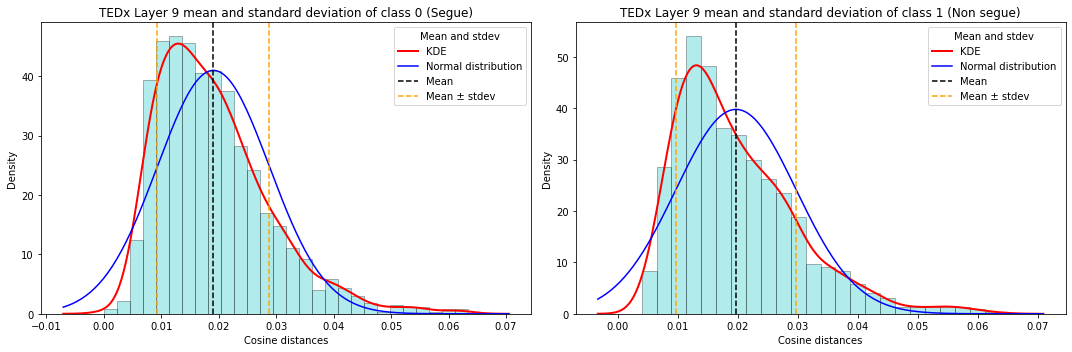

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0213
StDev: 0.0108
Mean: 0.0220
StDev: 0.0110


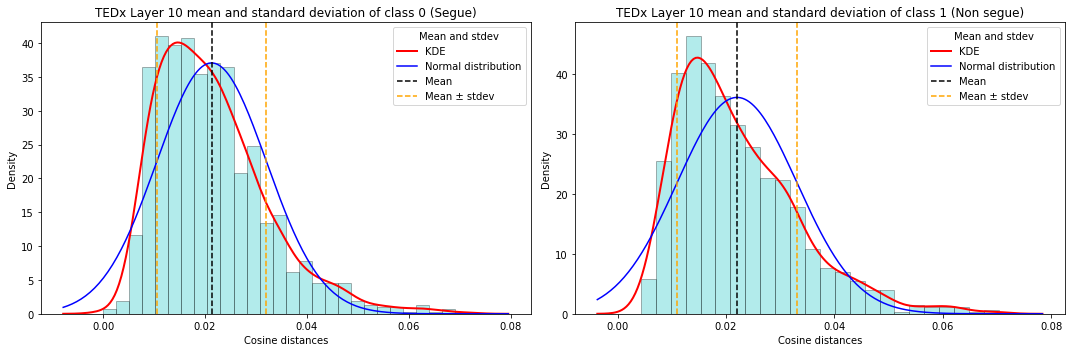

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0237
StDev: 0.0118
Mean: 0.0244
StDev: 0.0121


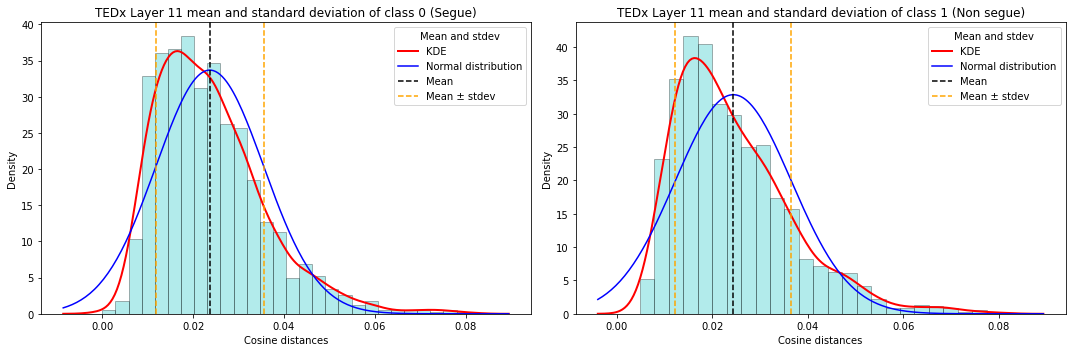

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0252
StDev: 0.0128
Mean: 0.0260
StDev: 0.0132


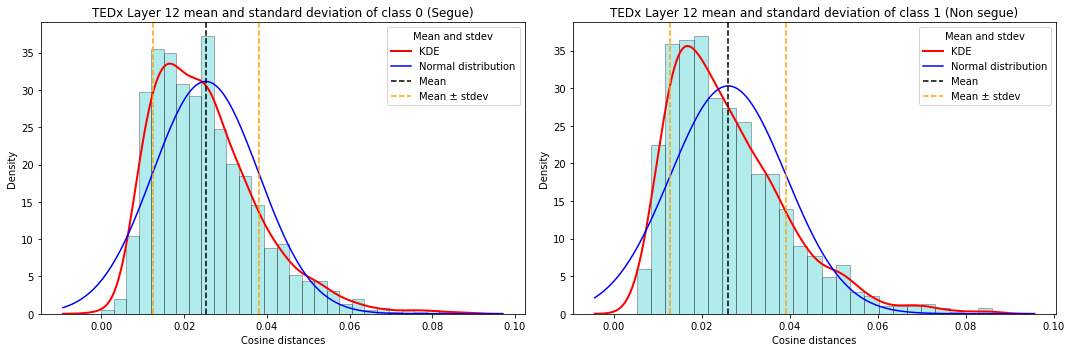

In [36]:
plot_mean_and_stdev(df_dist_10_cosine_distance_no_pretrain)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0022
StDev: 0.0011
Mean: 0.0024
StDev: 0.0012


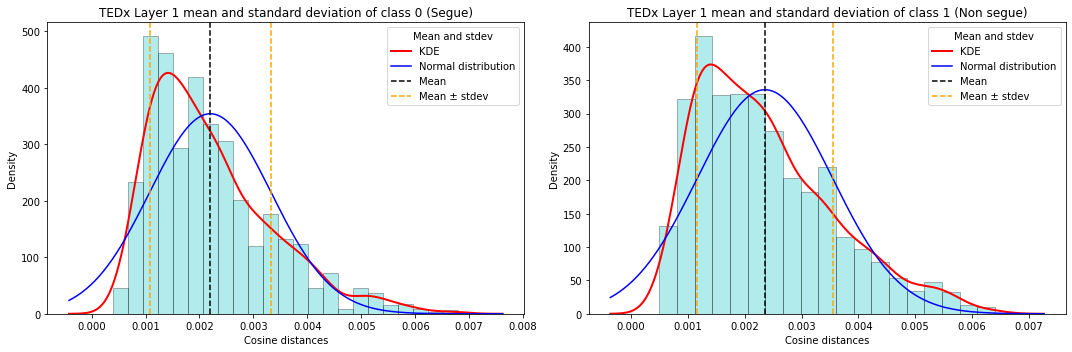

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0043
StDev: 0.0022
Mean: 0.0046
StDev: 0.0023


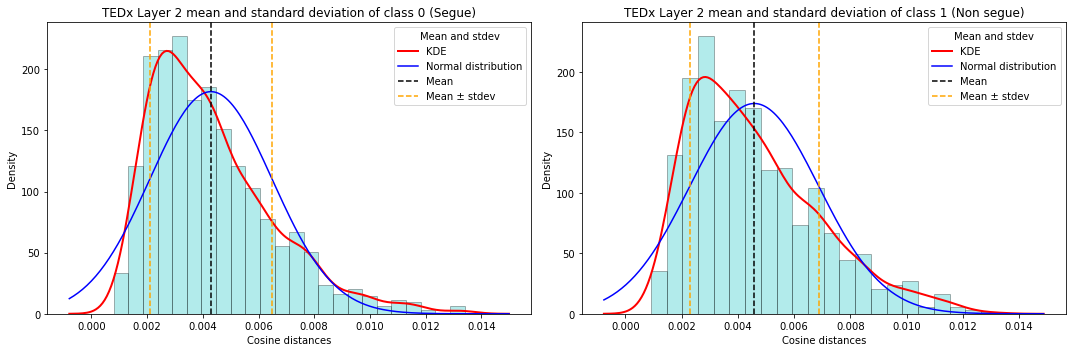

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0064
StDev: 0.0032
Mean: 0.0068
StDev: 0.0033


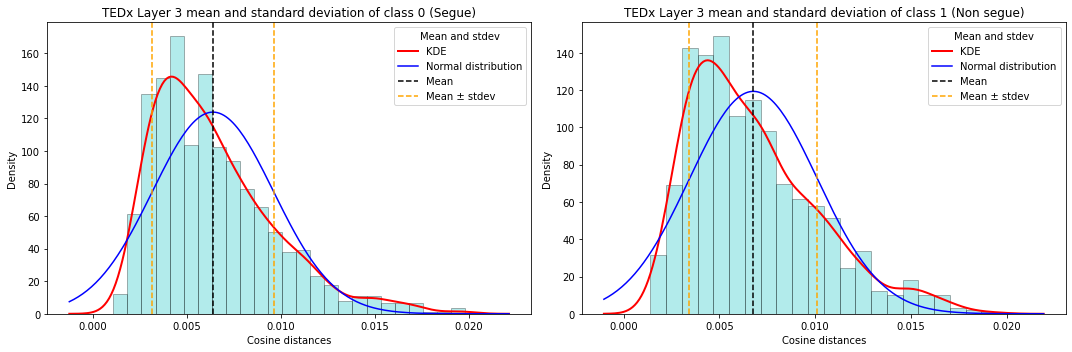

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0089
StDev: 0.0045
Mean: 0.0094
StDev: 0.0047


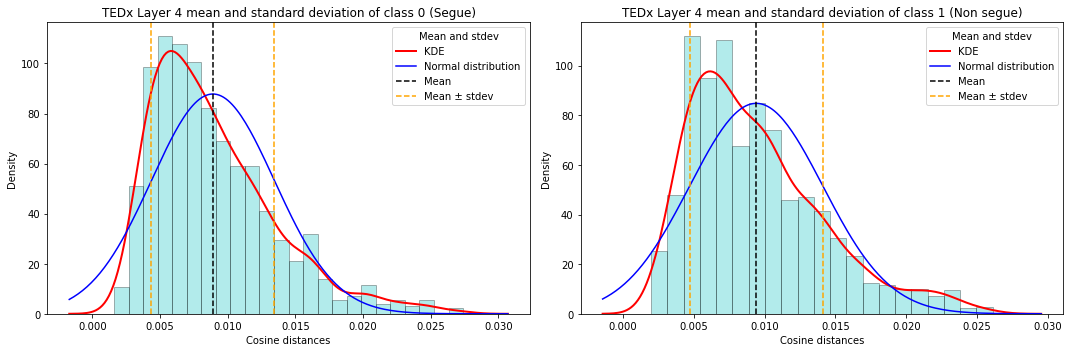

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0112
StDev: 0.0058
Mean: 0.0118
StDev: 0.0060


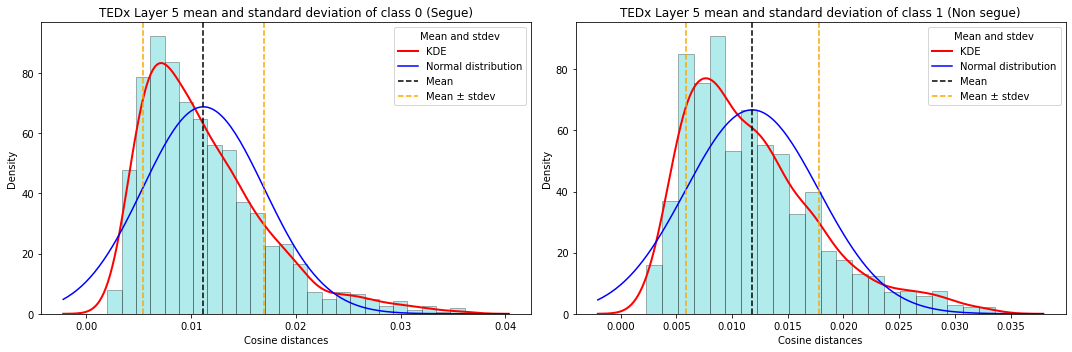

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0132
StDev: 0.0066
Mean: 0.0140
StDev: 0.0069


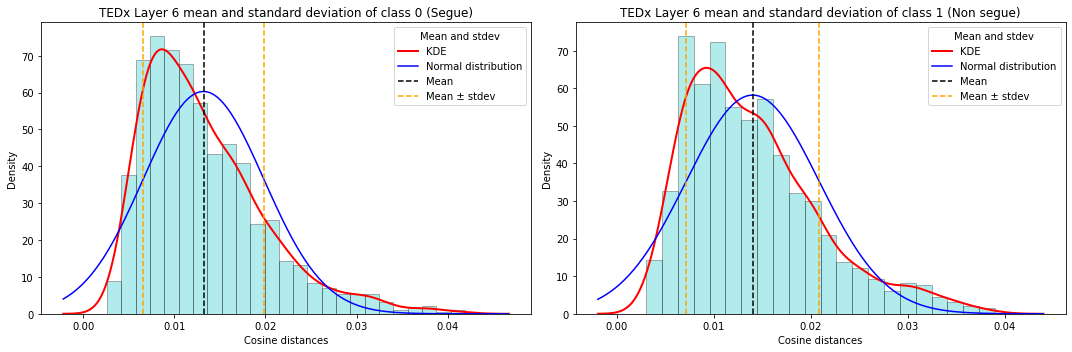

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0158
StDev: 0.0079
Mean: 0.0168
StDev: 0.0082


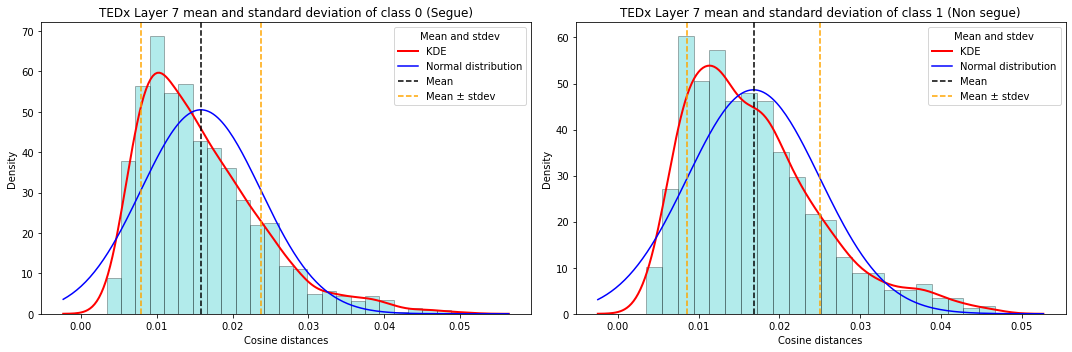

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0176
StDev: 0.0086
Mean: 0.0186
StDev: 0.0089


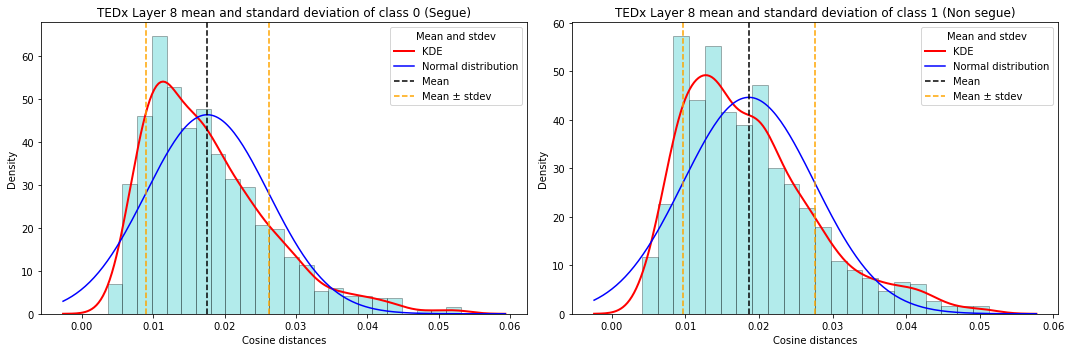

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0204
StDev: 0.0100
Mean: 0.0216
StDev: 0.0104


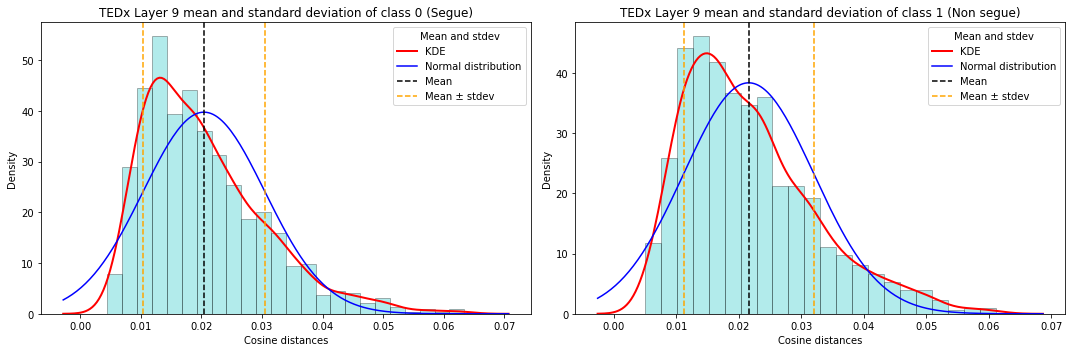

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0214
StDev: 0.0106
Mean: 0.0227
StDev: 0.0109


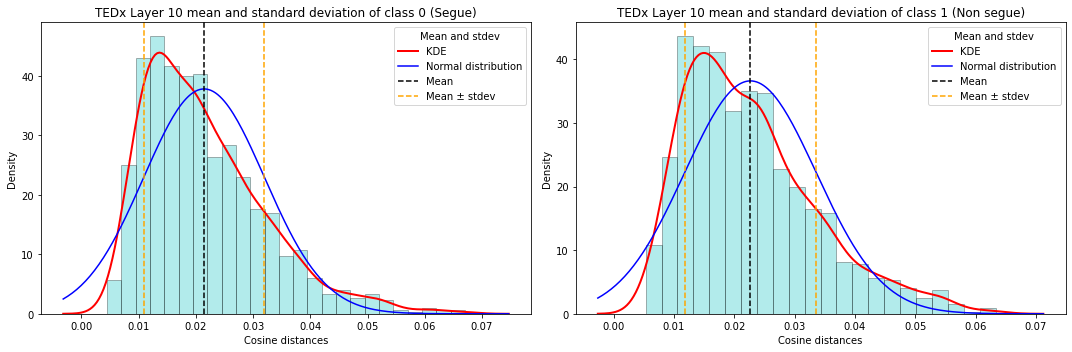

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0238
StDev: 0.0116
Mean: 0.0253
StDev: 0.0121


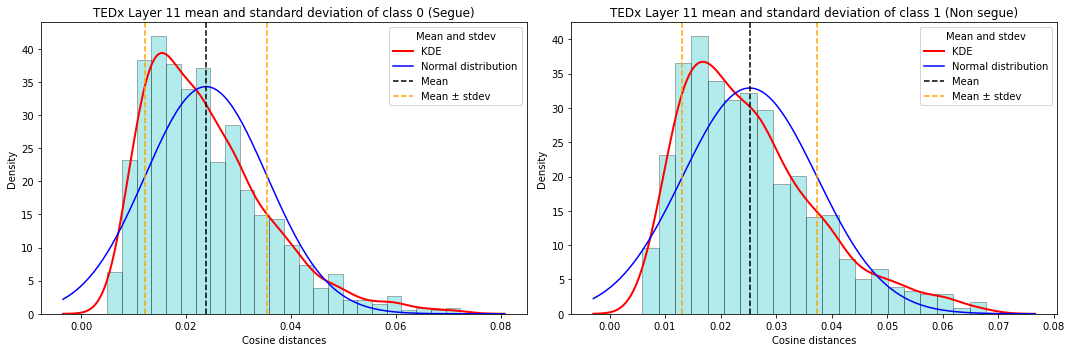

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0245
StDev: 0.0118
Mean: 0.0259
StDev: 0.0122


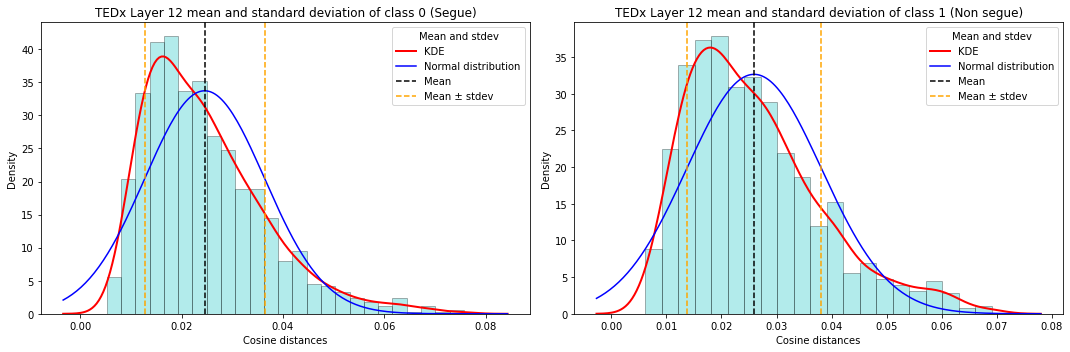

In [37]:
plot_mean_and_stdev(df_dist_20_cosine_distance_no_pretrain)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0021
StDev: 0.0011
Mean: 0.0022
StDev: 0.0011


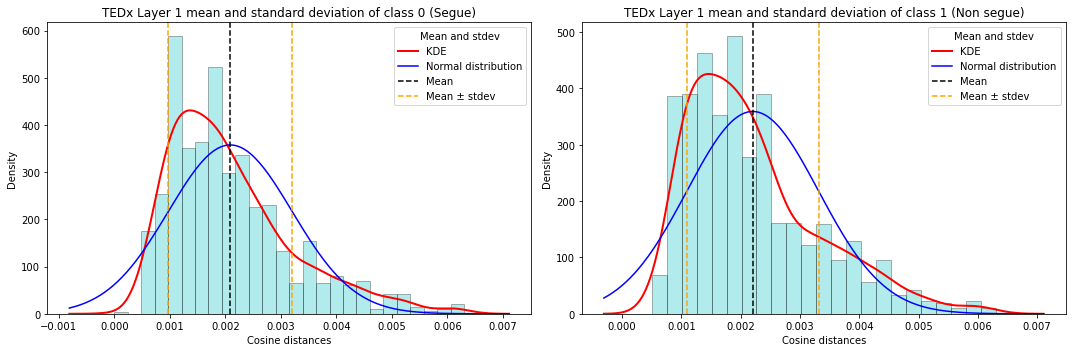

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0043
StDev: 0.0023
Mean: 0.0045
StDev: 0.0023


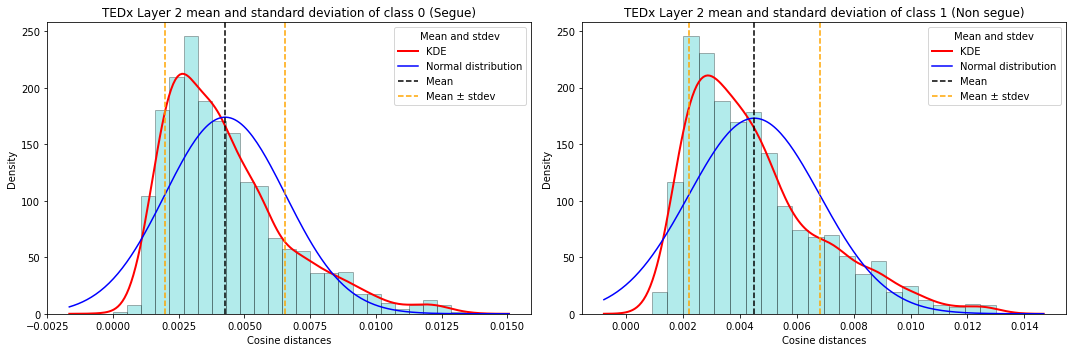

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0067
StDev: 0.0036
Mean: 0.0071
StDev: 0.0036


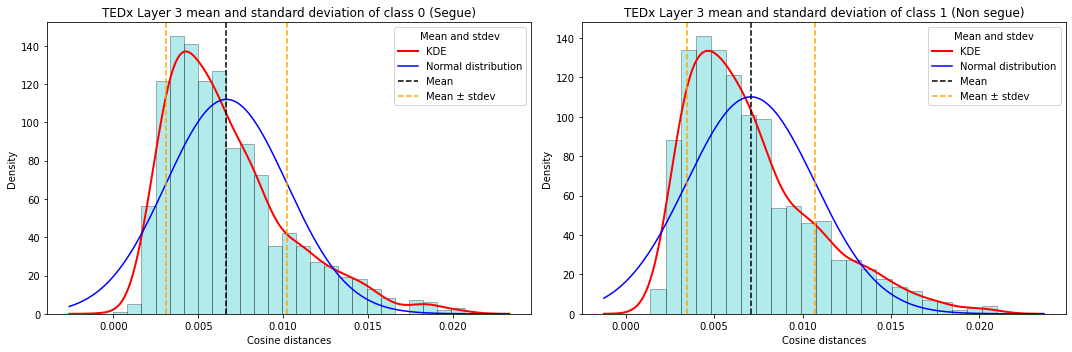

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0092
StDev: 0.0049
Mean: 0.0098
StDev: 0.0050


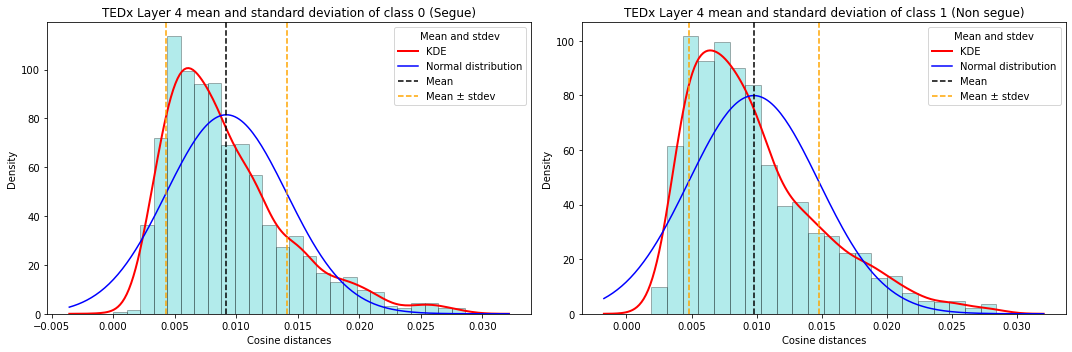

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0122
StDev: 0.0065
Mean: 0.0130
StDev: 0.0067


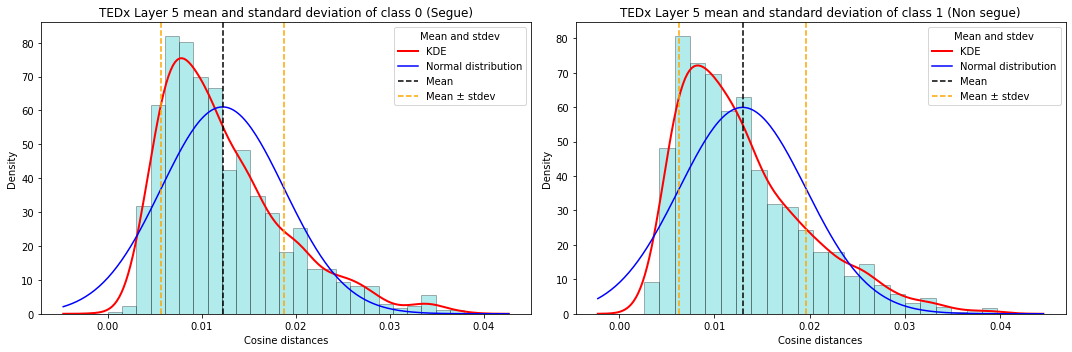

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0148
StDev: 0.0079
Mean: 0.0157
StDev: 0.0080


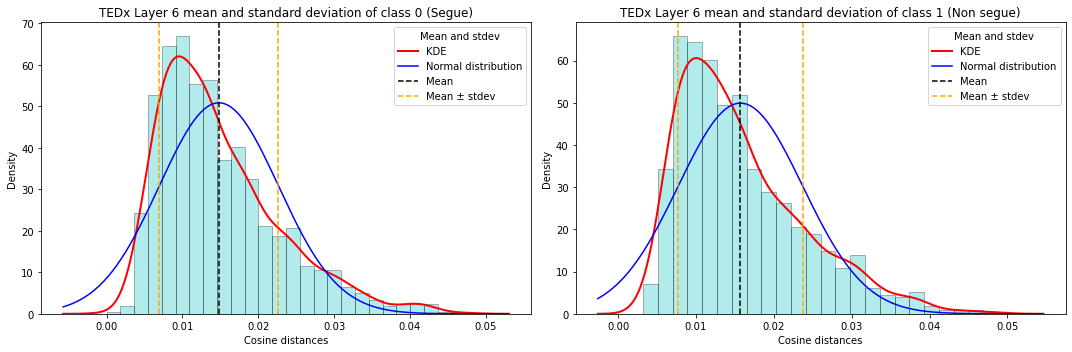

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0178
StDev: 0.0094
Mean: 0.0189
StDev: 0.0097


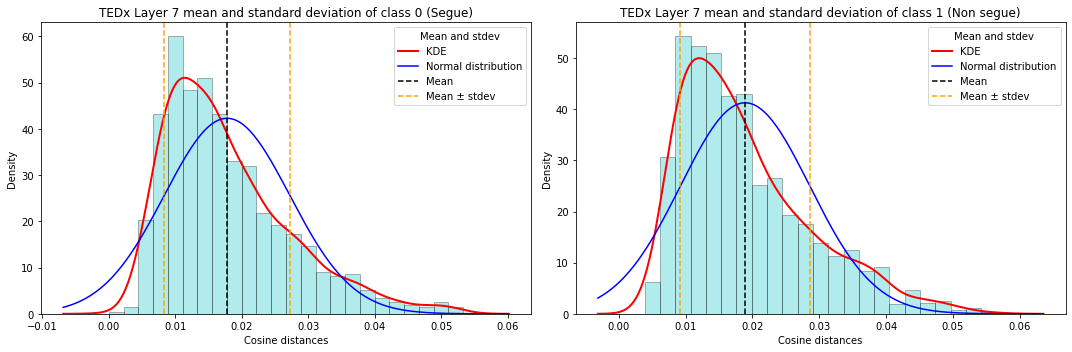

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0196
StDev: 0.0104
Mean: 0.0208
StDev: 0.0106


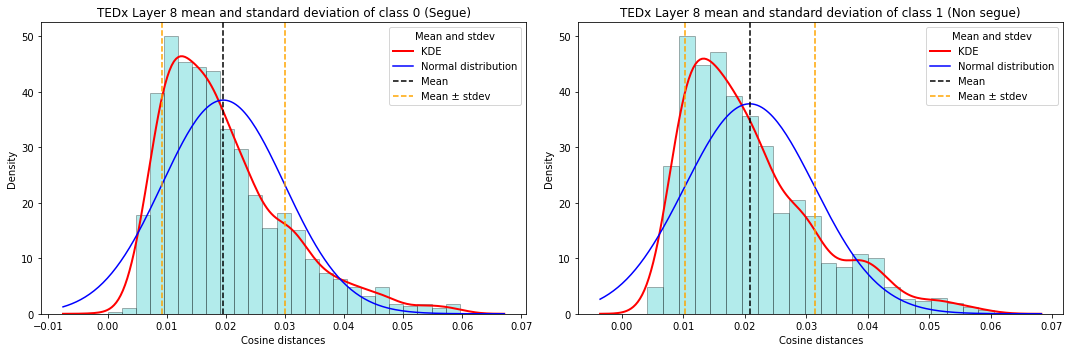

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0216
StDev: 0.0113
Mean: 0.0229
StDev: 0.0115


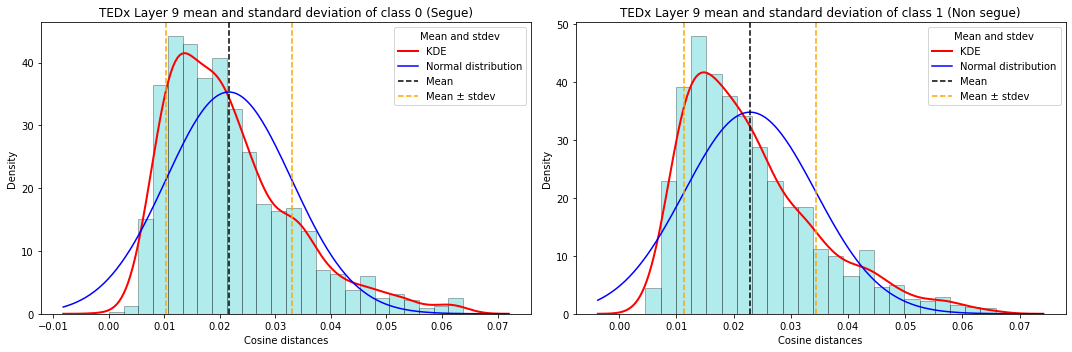

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0248
StDev: 0.0132
Mean: 0.0262
StDev: 0.0133


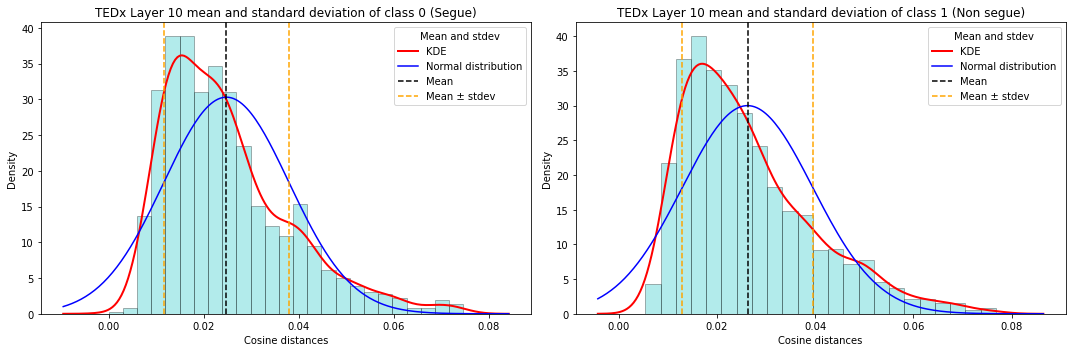

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0276
StDev: 0.0147
Mean: 0.0293
StDev: 0.0149


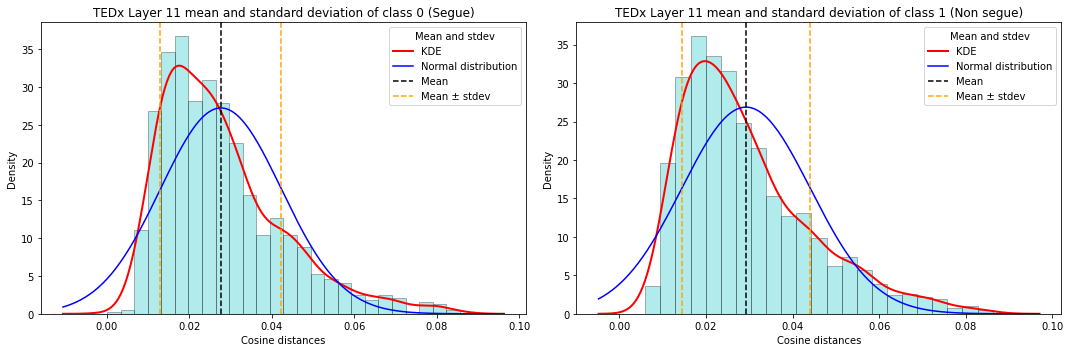

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0283
StDev: 0.0149
Mean: 0.0299
StDev: 0.0151


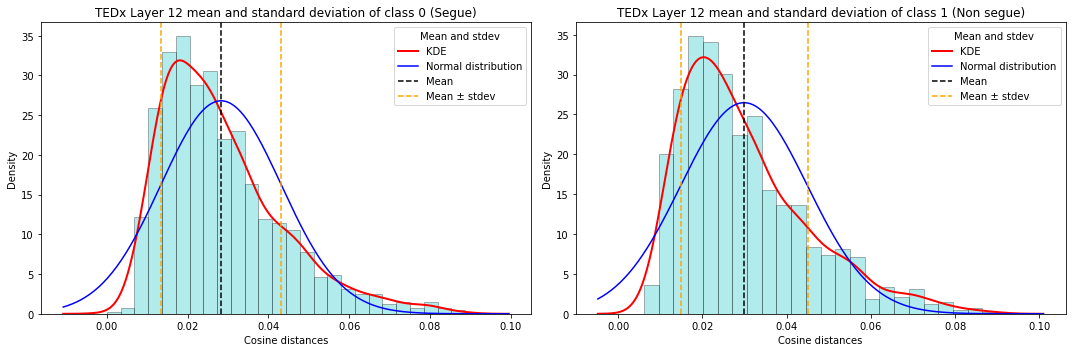

In [38]:
plot_mean_and_stdev(df_dist_30_cosine_distance_no_pretrain)

In [39]:
df_cosine_distances_dict_no_pretrain['df_dist_5']

{'Cosine_distance_layer_1': {'1': {'Mean': 0.0022,
   'Standard Deviation': 0.0011},
  '0': {'Mean': 0.0021, 'Standard Deviation': 0.0011}},
 'Cosine_distance_layer_2': {'1': {'Mean': 0.0046,
   'Standard Deviation': 0.0024},
  '0': {'Mean': 0.0045, 'Standard Deviation': 0.0024}},
 'Cosine_distance_layer_3': {'1': {'Mean': 0.007,
   'Standard Deviation': 0.0037},
  '0': {'Mean': 0.0069, 'Standard Deviation': 0.0036}},
 'Cosine_distance_layer_4': {'1': {'Mean': 0.0095,
   'Standard Deviation': 0.0049},
  '0': {'Mean': 0.0093, 'Standard Deviation': 0.0048}},
 'Cosine_distance_layer_5': {'1': {'Mean': 0.012,
   'Standard Deviation': 0.0061},
  '0': {'Mean': 0.0117, 'Standard Deviation': 0.006}},
 'Cosine_distance_layer_6': {'1': {'Mean': 0.0146,
   'Standard Deviation': 0.0074},
  '0': {'Mean': 0.0142, 'Standard Deviation': 0.0074}},
 'Cosine_distance_layer_7': {'1': {'Mean': 0.0166,
   'Standard Deviation': 0.0083},
  '0': {'Mean': 0.0162, 'Standard Deviation': 0.0082}},
 'Cosine_distanc